<h1>Which factors affect the winners of a tennis match the most?</h1>
Group Members:<br>
Mukund Shankar, UID 117803778,<br>
Sathya Gnanakumar, UID 118276182,<br>
Nikhil Rangappagari, UID 117776553,<br>
Hitaansh Gaur, UID 117797039,<br>

In the realm of sports, numbers can be difficult to understand - there are so many measurable statistics and figures, which can make it difficult to understand and identify the important ones. The greats of the game including Roger Federer, Rafael Nadal, and Novak Djokovic all have their unique styles and have achieved great success. However, they are incredible talents and are the outliers not the norm. We aim to look at all matches at the ATP level and determine what common trends we can pick out through a large sample of professional matches.

In this analysis we analyze the most important counting statistics to track in a match. This includes data points such as surface, player dexterity, player ranking, player height, age, number of aces, first serve percentage, and so on. 

Analyzing and understanding these statistics can be useful to tennis players to improve on their game and increase their competitive edge. Our aim in this analysis is to figure out if there is a specific statistic(s) that are most relevant to a player's chances of winning a particular match. As we are also avid tennis players, we are also interested in the results of this study.

This specific analysis is based on ATP Figures for Men's tennis (Singles).

First, we need to collect our data and store it in order to analyze it. Before that, however, we should import all the python libraries we will need througout this analysis process.

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from scipy import stats
import matplotlib.style as style

<h1>Data Collection</h1>

First, download the relevant csv files from https://www.kaggle.com/datasets/gmadevs/atp-matches-dataset. Then, copy the csv files into a new folder called 'data', within the same folder as our python file. 
<br><br>
Then, using the read_csv pandas function, read each individual file in.

In [64]:
# Read all the necessary csv files into individual dataframes
df_2000 = pd.read_csv('./data/atp_matches_2000.csv')
df_2001 = pd.read_csv('./data/atp_matches_2001.csv')
df_2002 = pd.read_csv('./data/atp_matches_2002.csv')
df_2003 = pd.read_csv('./data/atp_matches_2003.csv')
df_2004 = pd.read_csv('./data/atp_matches_2004.csv')
df_2005 = pd.read_csv('./data/atp_matches_2005.csv')
df_2006 = pd.read_csv('./data/atp_matches_2006.csv')
df_2007 = pd.read_csv('./data/atp_matches_2007.csv')
df_2008 = pd.read_csv('./data/atp_matches_2008.csv')
df_2009 = pd.read_csv('./data/atp_matches_2009.csv')
df_2010 = pd.read_csv('./data/atp_matches_2010.csv')
df_2011 = pd.read_csv('./data/atp_matches_2011.csv')
df_2012 = pd.read_csv('./data/atp_matches_2012.csv')
df_2013 = pd.read_csv('./data/atp_matches_2013.csv')
df_2014 = pd.read_csv('./data/atp_matches_2014.csv')
df_2015 = pd.read_csv('./data/atp_matches_2015.csv')

Verify that the file is correctly read on a couple of examples of dataframes

In [65]:
df_2016 = pd.read_csv('./data/atp_matches_2016.csv')
df_2016

tourney_id                 tourney_name surface  \
0                           2016-M020                     Brisbane    Hard   
1                           2016-M020                     Brisbane    Hard   
2                           2016-M020                     Brisbane    Hard   
3                           2016-M020                     Brisbane    Hard   
4                           2016-M020                     Brisbane    Hard   
...                               ...                          ...     ...   
2999  2016-M-DC-2016-WG-PO-KAZ-RUS-01  Davis Cup WG PO: KAZ vs RUS    Hard   
3000  2016-M-DC-2016-WG-PO-SUI-UZB-01  Davis Cup WG PO: SUI vs UZB    Clay   
3001  2016-M-DC-2016-WG-PO-SUI-UZB-01  Davis Cup WG PO: SUI vs UZB    Clay   
3002  2016-M-DC-2016-WG-PO-SUI-UZB-01  Davis Cup WG PO: SUI vs UZB    Clay   
3003  2016-M-DC-2016-WG-PO-SUI-UZB-01  Davis Cup WG PO: SUI vs UZB    Clay   

      draw_size tourney_level  tourney_date  match_num  winner_id  \
0          32.0             A    20160104.0      300.0   105683.0   
1          32.0             A    20160104.0      299.0   103819.0   
2          32.0             A    20160104.0      298.0   105683.0   
3          32.0             A    20160104.0      297.0   103819.0   
4          32.0             A    20160104.0      296.0   106233.0   
...         ...           ...           ...        ...        ...   
2999        4.0             D    20160916.0        4.0   105723.0   
3000        4.0             D    20160916.0        1.0   104797.0   
3001        4.0             D    20160916.0        2.0   105967.0   
3002        4.0             D    20160916.0        4.0   104797.0   
3003        4.0             D    20160916.0        5.0   134472.0   

      winner_seed winner_entry  ... w_bpFaced l_ace  l_df l_svpt  l_1stIn  \
0             4.0          NaN  ...       1.0   7.0   3.0   61.0     34.0   
1             1.0          NaN  ...       1.0   2.0   4.0   55.0     31.0   
2             4.0          NaN  ...       4.0  10.0   3.0   84.0     54.0   
3             1.0          NaN  ...       1.0   8.0   2.0  104.0     62.0   
4             8.0          NaN  ...       2.0  11.0   2.0   98.0     52.0   
...           ...          ...  ...       ...   ...   ...    ...      ...   
2999          NaN          NaN  ...       1.0   2.0   2.0   87.0     60.0   
3000          NaN          NaN  ...       1.0   4.0   3.0   88.0     53.0   
3001          NaN          NaN  ...       3.0   3.0   1.0  107.0     73.0   
3002          NaN          NaN  ...       8.0   3.0   6.0  169.0    103.0   
3003          NaN          NaN  ...       8.0   8.0   3.0  114.0     63.0   

      l_1stWon  l_2ndWon  l_SvGms  l_bpSaved l_bpFaced  
0         25.0      14.0     10.0        3.0       5.0  
1         18.0       9.0      8.0        2.0       6.0  
2         41.0      16.0     12.0        2.0       2.0  
3         46.0      21.0     16.0        8.0      11.0  
4         41.0      27.0     15.0        7.0       8.0  
...        ...       ...      ...        ...       ...  
2999      34.0       8.0     11.0        7.0      13.0  
3000      35.0      14.0     13.0        4.0       8.0  
3001      36.0      18.0     12.0       10.0      16.0  
3002      70.0      34.0     24.0        2.0       7.0  
3003      39.0      26.0     19.0        6.0      14.0  

[3004 rows x 49 columns]

The following import is isolated because it was causing warnings when run with the other lines of code.

In [66]:
df_2017 = pd.read_csv('./data/atp_matches_2017.csv', index_col=False)
df_2017

/var/folders/gx/9ss39m455rl9klmbs793xqnm0000gn/T/ipykernel_27094/855321516.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df_2017 = pd.read_csv('./data/atp_matches_2017.csv', index_col=False)


tourney_id                 tourney_name surface  \
0                         2017-M020                     Brisbane    Hard   
1                         2017-M020                     Brisbane    Hard   
2                         2017-M020                     Brisbane    Hard   
3                         2017-M020                     Brisbane    Hard   
4                         2017-M020                     Brisbane    Hard   
..                              ...                          ...     ...   
383  2017-M-DC-2017-WG-M-RUS-SRB-01  Davis Cup WG R1: RUS vs SRB    Hard   
384  2017-M-DC-2017-WG-M-SUI-USA-01  Davis Cup WG R1: SUI vs USA    Hard   
385  2017-M-DC-2017-WG-M-SUI-USA-01  Davis Cup WG R1: SUI vs USA    Hard   
386  2017-M-DC-2017-WG-M-SUI-USA-01  Davis Cup WG R1: SUI vs USA    Hard   
387  2017-M-DC-2017-WG-M-SUI-USA-01  Davis Cup WG R1: SUI vs USA    Hard   

     draw_size tourney_level  tourney_date  match_num  winner_id  winner_seed  \
0           32             A      20170102        300     105777          7.0   
1           32             A      20170102        299     105777          7.0   
2           32             A      20170102        298     105453          3.0   
3           32             A      20170102        297     105683          1.0   
4           32             A      20170102        296     105777          7.0   
..         ...           ...           ...        ...        ...          ...   
383          4             D      20170203          5     106421          NaN   
384          4             D      20170203          1     106058          NaN   
385          4             D      20170203          2     104545          NaN   
386          4             D      20170203          4     105023          NaN   
387          4             D      20170203          5     105449          NaN   

    winner_entry  ... w_bpFaced l_ace  l_df l_svpt  l_1stIn  l_1stWon  \
0            NaN  ...       7.0   4.0   0.0   69.0     49.0      36.0   
1            NaN  ...       0.0   4.0   3.0   61.0     28.0      24.0   
2            NaN  ...       5.0   9.0   2.0   61.0     37.0      27.0   
3            NaN  ...       7.0   4.0   0.0   84.0     61.0      39.0   
4            NaN  ...      14.0   6.0   5.0   82.0     37.0      29.0   
..           ...  ...       ...   ...   ...    ...      ...       ...   
383          NaN  ...       NaN   NaN   NaN    NaN      NaN       NaN   
384          NaN  ...       4.0   4.0   5.0   82.0     52.0      38.0   
385          NaN  ...       9.0   7.0   9.0  113.0     76.0      53.0   
386          NaN  ...       0.0   3.0   2.0   76.0     42.0      30.0   
387          NaN  ...       4.0   1.0   2.0   54.0     27.0      15.0   

     l_2ndWon  l_SvGms  l_bpSaved l_bpFaced  
0         9.0     12.0        2.0       5.0  
1        16.0     10.0        2.0       4.0  
2        10.0     10.0        0.0       2.0  
3        14.0     14.0        2.0       4.0  
4        24.0     14.0        4.0       7.0  
..        ...      ...        ...       ...  
383       NaN      NaN        NaN       NaN  
384       9.0     13.0        7.0      12.0  
385      17.0     19.0        7.0      11.0  
386      14.0     10.0        8.0      10.0  
387      15.0      9.0        2.0       6.0  

[388 rows x 49 columns]

Now that we have collected all of our necessary data and placed them into dataframes, let's compile them into one single dataframe using pandas' concat function, then verify that our dataframe is correctly formatted.

In [67]:
df_list = [df_2000, df_2001, df_2002, df_2003, df_2004, df_2005, df_2006, df_2007, df_2008, df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017]
df = pd.concat(df_list)
df

tourney_id                 tourney_name surface  \
0                          2000-717                      Orlando    Clay   
1                          2000-717                      Orlando    Clay   
2                          2000-717                      Orlando    Clay   
3                          2000-717                      Orlando    Clay   
4                          2000-717                      Orlando    Clay   
..                              ...                          ...     ...   
383  2017-M-DC-2017-WG-M-RUS-SRB-01  Davis Cup WG R1: RUS vs SRB    Hard   
384  2017-M-DC-2017-WG-M-SUI-USA-01  Davis Cup WG R1: SUI vs USA    Hard   
385  2017-M-DC-2017-WG-M-SUI-USA-01  Davis Cup WG R1: SUI vs USA    Hard   
386  2017-M-DC-2017-WG-M-SUI-USA-01  Davis Cup WG R1: SUI vs USA    Hard   
387  2017-M-DC-2017-WG-M-SUI-USA-01  Davis Cup WG R1: SUI vs USA    Hard   

     draw_size tourney_level  tourney_date  match_num  winner_id  winner_seed  \
0         32.0             A    20000501.0        1.0   102179.0          NaN   
1         32.0             A    20000501.0        2.0   103602.0          NaN   
2         32.0             A    20000501.0        3.0   103387.0          NaN   
3         32.0             A    20000501.0        4.0   101733.0          NaN   
4         32.0             A    20000501.0        5.0   101727.0          4.0   
..         ...           ...           ...        ...        ...          ...   
383        4.0             D    20170203.0        5.0   106421.0          NaN   
384        4.0             D    20170203.0        1.0   106058.0          NaN   
385        4.0             D    20170203.0        2.0   104545.0          NaN   
386        4.0             D    20170203.0        4.0   105023.0          NaN   
387        4.0             D    20170203.0        5.0   105449.0          NaN   

    winner_entry  ... w_bpFaced l_ace  l_df l_svpt  l_1stIn  l_1stWon  \
0            NaN  ...      15.0  13.0   4.0  110.0     59.0      49.0   
1              Q  ...       6.0   0.0   0.0   57.0     24.0      13.0   
2            NaN  ...       0.0   2.0   2.0   65.0     39.0      22.0   
3            NaN  ...      12.0   4.0   6.0  104.0     57.0      35.0   
4            NaN  ...       1.0   0.0   3.0   47.0     28.0      17.0   
..           ...  ...       ...   ...   ...    ...      ...       ...   
383          NaN  ...       NaN   NaN   NaN    NaN      NaN       NaN   
384          NaN  ...       4.0   4.0   5.0   82.0     52.0      38.0   
385          NaN  ...       9.0   7.0   9.0  113.0     76.0      53.0   
386          NaN  ...       0.0   3.0   2.0   76.0     42.0      30.0   
387          NaN  ...       4.0   1.0   2.0   54.0     27.0      15.0   

     l_2ndWon  l_SvGms  l_bpSaved l_bpFaced  
0        31.0     17.0        4.0       4.0  
1        17.0     10.0        4.0       9.0  
2        10.0      8.0        6.0      10.0  
3        24.0     15.0        6.0      11.0  
4        10.0      8.0        3.0       6.0  
..        ...      ...        ...       ...  
383       NaN      NaN        NaN       NaN  
384       9.0     13.0        7.0      12.0  
385      17.0     19.0        7.0      11.0  
386      14.0     10.0        8.0      10.0  
387      15.0      9.0        2.0       6.0  

[53571 rows x 49 columns]

Now that we have our data loaded in correctly, we need to check how much of our data is missing and how to handle it.

In [68]:
# Find out what % of our dataframe is missing (null)
df.isnull().sum().sum()/df.size

0.11131708101283858

Approximately 11% of the cells in our data contain null columns. We need to drop the rows with null columns, since we will only read in relevant information to our dataframe. Let us look at which columns we want to drop and get remove them.

Here is a link we used for further research on how to deal with missing data: https://www.analyticsvidhya.com/blog/2021/04/how-to-handle-missing-values-of-categorical-variables/

After reading the article and knowledge from lecture, we thought that removing the null data would probably be the best idea since extrapolating would be difficult and not really affect our data. This is because the amount of missing data would most likely not affect trends in our data. To do so, let's look at the list of our columns first:

In [69]:
# Output all the columns in the dataframe.
for c in df.columns:
    print(c)

tourney_id
tourney_name
surface
draw_size
tourney_level
tourney_date
match_num
winner_id
winner_seed
winner_entry
winner_name
winner_hand
winner_ht
winner_ioc
winner_age
winner_rank
winner_rank_points
loser_id
loser_seed
loser_entry
loser_name
loser_hand
loser_ht
loser_ioc
loser_age
loser_rank
loser_rank_points
score
best_of
round
minutes
w_ace
w_df
w_svpt
w_1stIn
w_1stWon
w_2ndWon
w_SvGms
w_bpSaved
w_bpFaced
l_ace
l_df
l_svpt
l_1stIn
l_1stWon
l_2ndWon
l_SvGms
l_bpSaved
l_bpFaced


From the list, the columns which will be irrelevant to our analysis are the ID's of tournaments and players, match number, score, best_of, round, minutes, winner_ioc, loser_ioc, player entries, draw_size, and rank points. We can drop those safely.

After dropping those, we can verify that our dataframe only has relevant columns:

In [70]:
# Drop all the unnecessary columns using indexes, and then display the dataframe
df = df.drop(df.columns[[0, 1, 3, 4, 5, 6, 7, 8, 9, 13, 16, 17, 18, 19, 23, 26, 27, 28, 29, 30]], axis=1)
df

surface          winner_name winner_hand  winner_ht  winner_age  \
0      Clay        Antony Dupuis           R      185.0   27.181383   
1      Clay    Fernando Gonzalez           R      183.0   19.756331   
2      Clay  Paradorn Srichaphan           R      185.0   20.881588   
3      Clay        Jan Siemerink           L      183.0   30.047912   
4      Clay    Jason Stoltenberg           R      185.0   30.075291   
..      ...                  ...         ...        ...         ...   
383    Hard      Daniil Medvedev           R        NaN   20.969199   
384    Hard            Jack Sock           R      185.0   24.350445   
385    Hard           John Isner           R      206.0   31.764545   
386    Hard          Sam Querrey           R      198.0   29.316906   
387    Hard        Steve Johnson           R      188.0   27.101985   

     winner_rank         loser_name loser_hand  loser_ht  loser_age  ...  \
0          113.0        Andrew Ilie          R     180.0  24.035592  ...   
1          352.0       Cecil Mamiit          R     173.0  23.843943  ...   
2          103.0   Sebastien Lareau          R     183.0  27.011636  ...   
3          107.0   Justin Gimelstob          R     196.0  23.260780  ...   
4           74.0   Alex Lopez Moron          R     175.0  29.423682  ...   
..           ...                ...        ...       ...        ...  ...   
383         63.0     Nenad Zimonjic          R     190.0  40.657084  ...   
384         20.0  Marco Chiudinelli          R     185.0  35.389459  ...   
385         23.0    Henri Laaksonen          R       NaN  24.835044  ...   
386         27.0      Adrien Bossel          L       NaN  30.091718  ...   
387         31.0    Antoine Bellier          U       NaN  20.284736  ...   

     w_bpFaced  l_ace  l_df  l_svpt  l_1stIn  l_1stWon  l_2ndWon  l_SvGms  \
0         15.0   13.0   4.0   110.0     59.0      49.0      31.0     17.0   
1          6.0    0.0   0.0    57.0     24.0      13.0      17.0     10.0   
2          0.0    2.0   2.0    65.0     39.0      22.0      10.0      8.0   
3         12.0    4.0   6.0   104.0     57.0      35.0      24.0     15.0   
4          1.0    0.0   3.0    47.0     28.0      17.0      10.0      8.0   
..         ...    ...   ...     ...      ...       ...       ...      ...   
383        NaN    NaN   NaN     NaN      NaN       NaN       NaN      NaN   
384        4.0    4.0   5.0    82.0     52.0      38.0       9.0     13.0   
385        9.0    7.0   9.0   113.0     76.0      53.0      17.0     19.0   
386        0.0    3.0   2.0    76.0     42.0      30.0      14.0     10.0   
387        4.0    1.0   2.0    54.0     27.0      15.0      15.0      9.0   

     l_bpSaved  l_bpFaced  
0          4.0        4.0  
1          4.0        9.0  
2          6.0       10.0  
3          6.0       11.0  
4          3.0        6.0  
..         ...        ...  
383        NaN        NaN  
384        7.0       12.0  
385        7.0       11.0  
386        8.0       10.0  
387        2.0        6.0  

[53571 rows x 29 columns]

In [71]:
# Now to check the columns we have:
for c in df.columns:
    print(c)

surface
winner_name
winner_hand
winner_ht
winner_age
winner_rank
loser_name
loser_hand
loser_ht
loser_age
loser_rank
w_ace
w_df
w_svpt
w_1stIn
w_1stWon
w_2ndWon
w_SvGms
w_bpSaved
w_bpFaced
l_ace
l_df
l_svpt
l_1stIn
l_1stWon
l_2ndWon
l_SvGms
l_bpSaved
l_bpFaced


So far, we have dropped all the columns with irrelevant information. Now, we need to deal with rows which have NaN entries in our dataframe.

In [72]:
df.isnull().sum().sum()/df.size

0.07592115909341068

Now, the proportion of missing data in our dataframe has dropped to around 7.5%, a significant improvement. However, this is still unacceptable for data analysis. Let's drop all rows with null entries:

In [73]:
df = df.dropna()

In [74]:
# Re-check how much of our data is missing after dropping all null entries.
print(df.isnull().sum().sum()/df.size)

0.0


Now, we have dropped all rows with null entries in our data frame. Our data is clean.

In [75]:
df = df[(df['winner_hand'] == 'L') | (df['winner_hand'] == 'R') | (df['loser_hand'] == 'L') | (df['loser_hand'] == 'R')]

In [76]:
# Transform our data: Change the symbol associated with dominant hand of player
#R -> W_R / L_R and L -> W_L/ L_L

df.loc[df["winner_hand"] == "R", "winner_hand"] = 'W_R'
df.loc[df["winner_hand"] == "L", "winner_hand"] = 'W_L'
df.loc[df["loser_hand"] == "R", "loser_hand"] = 'L_R'
df.loc[df["loser_hand"] == "L", "loser_hand"] = 'L_L'
dummies_df = pd.get_dummies(df[['winner_hand', 'loser_hand']])
df_list = [df, dummies_df]
df = pd.concat(df_list, axis = 1)

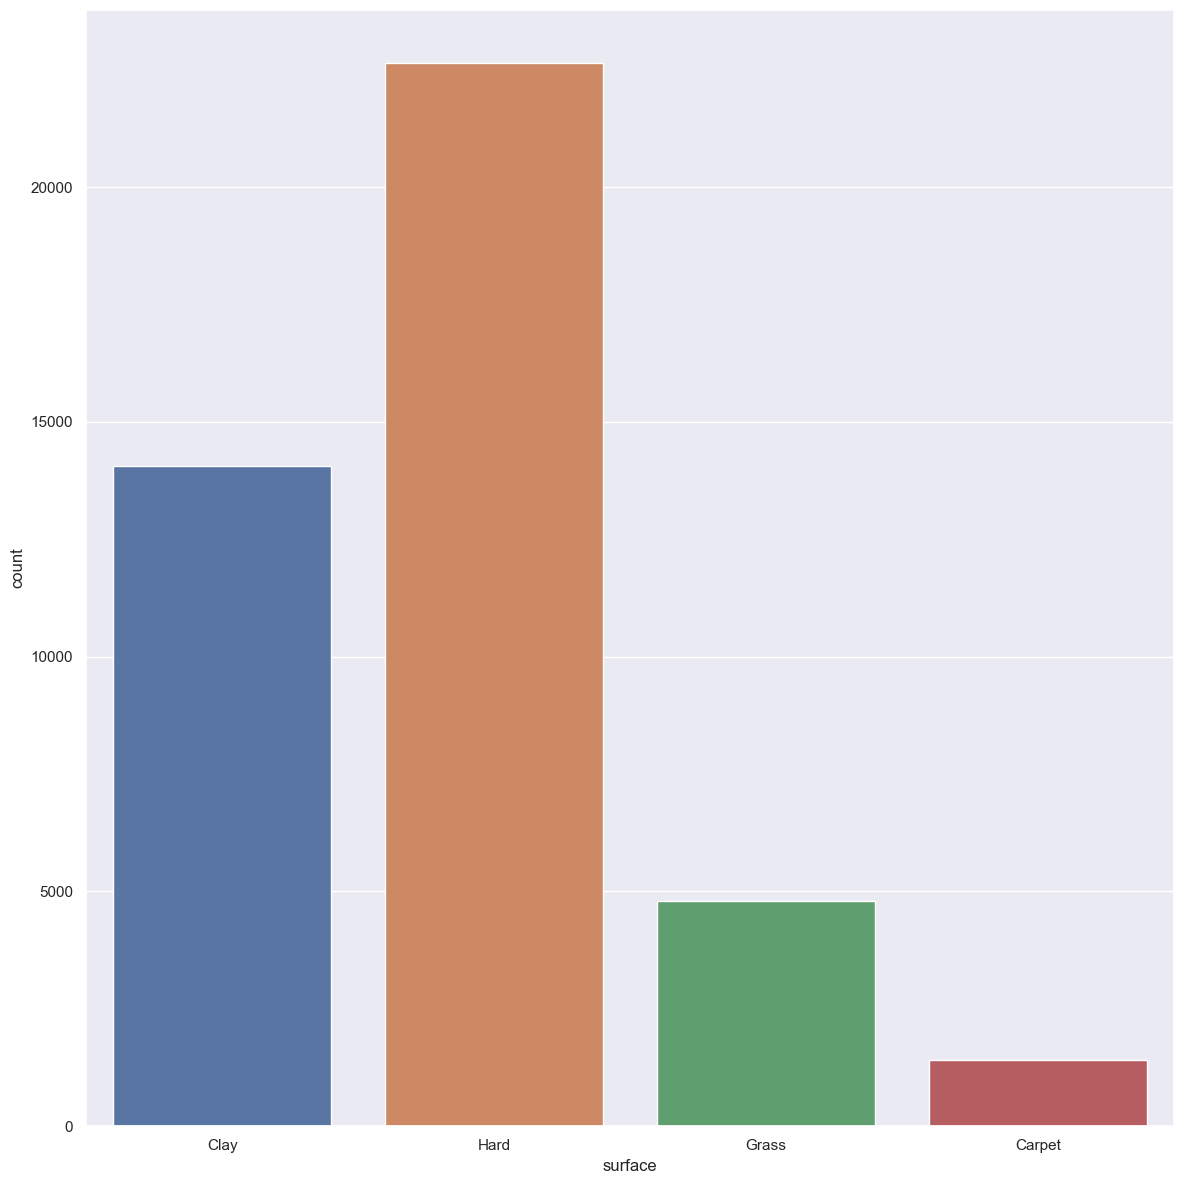

In [77]:
#To decide how to label our surfaces, let's use a frequency chart of the surfaces present in the dataframe.
# Make a plot of all the surfaces.
pt = sns.countplot(x = df['surface'], data=None)

In [78]:
(df['loser_hand'] == 'U').count() 

#There is 1 person with U hand -> remove since it we just want R and L hand

df = df.loc[df["loser_hand"] != 'U']
df

surface          winner_name winner_hand  winner_ht  winner_age  \
0      Clay        Antony Dupuis         W_R      185.0   27.181383   
1      Clay    Fernando Gonzalez         W_R      183.0   19.756331   
2      Clay  Paradorn Srichaphan         W_R      185.0   20.881588   
3      Clay        Jan Siemerink         W_L      183.0   30.047912   
4      Clay    Jason Stoltenberg         W_R      185.0   30.075291   
..      ...                  ...         ...        ...         ...   
358    Clay        Andreas Seppi         W_R      190.0   32.941821   
359    Clay       Carlos Berlocq         W_R      183.0   33.990418   
361    Hard         Steve Darcis         W_R      178.0   32.884326   
367    Hard       Vasek Pospisil         W_R      193.0   26.606434   
384    Hard            Jack Sock         W_R      185.0   24.350445   

     winner_rank             loser_name loser_hand  loser_ht  loser_age  ...  \
0          113.0            Andrew Ilie        L_R     180.0  24.035592  ...   
1          352.0           Cecil Mamiit        L_R     173.0  23.843943  ...   
2          103.0       Sebastien Lareau        L_R     183.0  27.011636  ...   
3          107.0       Justin Gimelstob        L_R     196.0  23.260780  ...   
4           74.0       Alex Lopez Moron        L_R     175.0  29.423682  ...   
..           ...                    ...        ...       ...        ...  ...   
358         68.0         Carlos Berlocq        L_R     183.0  33.990418  ...   
359         81.0          Paolo Lorenzi        L_R     183.0  35.126626  ...   
361         58.0  Philipp Kohlschreiber        L_R     178.0  33.292266  ...   
367        133.0           Daniel Evans        L_R     175.0  26.691307  ...   
384         20.0      Marco Chiudinelli        L_R     185.0  35.389459  ...   

     l_1stWon  l_2ndWon  l_SvGms  l_bpSaved  l_bpFaced  winner_hand_W_L  \
0        49.0      31.0     17.0        4.0        4.0                0   
1        13.0      17.0     10.0        4.0        9.0                0   
2        22.0      10.0      8.0        6.0       10.0                0   
3        35.0      24.0     15.0        6.0       11.0                1   
4        17.0      10.0      8.0        3.0        6.0                0   
..        ...       ...      ...        ...        ...              ...   
358      40.0      22.0     17.0       10.0       17.0                0   
359      63.0      24.0     22.0        9.0       15.0                0   
361      82.0      24.0     25.0        6.0       11.0                0   
367      67.0      25.0     21.0        5.0       10.0                0   
384      38.0       9.0     13.0        7.0       12.0                0   

     winner_hand_W_R  loser_hand_L_L  loser_hand_L_R  loser_hand_U  
0                  1               0               1             0  
1                  1               0               1             0  
2                  1               0               1             0  
3                  0               0               1             0  
4                  1               0               1             0  
..               ...             ...             ...           ...  
358                1               0               1             0  
359                1               0               1             0  
361                1               0               1             0  
367                1               0               1             0  
384                1               0               1             0  

[42923 rows x 34 columns]

In [79]:
dummy_df = pd.get_dummies(df['surface'])
df_list = [df, dummy_df]
df = pd.concat(df_list, axis=1)

In [80]:
df.dtypes

surface             object
winner_name         object
winner_hand         object
winner_ht          float64
winner_age         float64
winner_rank        float64
loser_name          object
loser_hand          object
loser_ht           float64
loser_age          float64
loser_rank         float64
w_ace              float64
w_df               float64
w_svpt             float64
w_1stIn            float64
w_1stWon           float64
w_2ndWon           float64
w_SvGms            float64
w_bpSaved          float64
w_bpFaced          float64
l_ace              float64
l_df               float64
l_svpt             float64
l_1stIn            float64
l_1stWon           float64
l_2ndWon           float64
l_SvGms            float64
l_bpSaved          float64
l_bpFaced          float64
winner_hand_W_L      uint8
winner_hand_W_R      uint8
loser_hand_L_L       uint8
loser_hand_L_R       uint8
loser_hand_U         uint8
Carpet               uint8
Clay                 uint8
Grass                uint8
H

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42923 entries, 0 to 384
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   surface          42923 non-null  object 
 1   winner_name      42923 non-null  object 
 2   winner_hand      42923 non-null  object 
 3   winner_ht        42923 non-null  float64
 4   winner_age       42923 non-null  float64
 5   winner_rank      42923 non-null  float64
 6   loser_name       42923 non-null  object 
 7   loser_hand       42923 non-null  object 
 8   loser_ht         42923 non-null  float64
 9   loser_age        42923 non-null  float64
 10  loser_rank       42923 non-null  float64
 11  w_ace            42923 non-null  float64
 12  w_df             42923 non-null  float64
 13  w_svpt           42923 non-null  float64
 14  w_1stIn          42923 non-null  float64
 15  w_1stWon         42923 non-null  float64
 16  w_2ndWon         42923 non-null  float64
 17  w_SvGms       

We are dropping the hand column since the hand of our player is not a factor a player can control. In addition, the surface is another factor that a player cannot control, as they are going to play on whatever surface the tournament they are competing in uses.

In [82]:
df = df.drop(df[['surface', 'winner_hand', 'loser_hand']], axis=1)

<h1>Exploratory Analysis</h1>

Some basic graphs to get an idea of the data we're looking at:

In [83]:
import matplotlib.pyplot as plt

In [84]:
df.columns

Index(['winner_name', 'winner_ht', 'winner_age', 'winner_rank', 'loser_name',
       'loser_ht', 'loser_age', 'loser_rank', 'w_ace', 'w_df', 'w_svpt',
       'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced',
       'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms',
       'l_bpSaved', 'l_bpFaced', 'winner_hand_W_L', 'winner_hand_W_R',
       'loser_hand_L_L', 'loser_hand_L_R', 'loser_hand_U', 'Carpet', 'Clay',
       'Grass', 'Hard'],
      dtype='object')

Generating some histograms to see the distribution of the values for each categorical variable

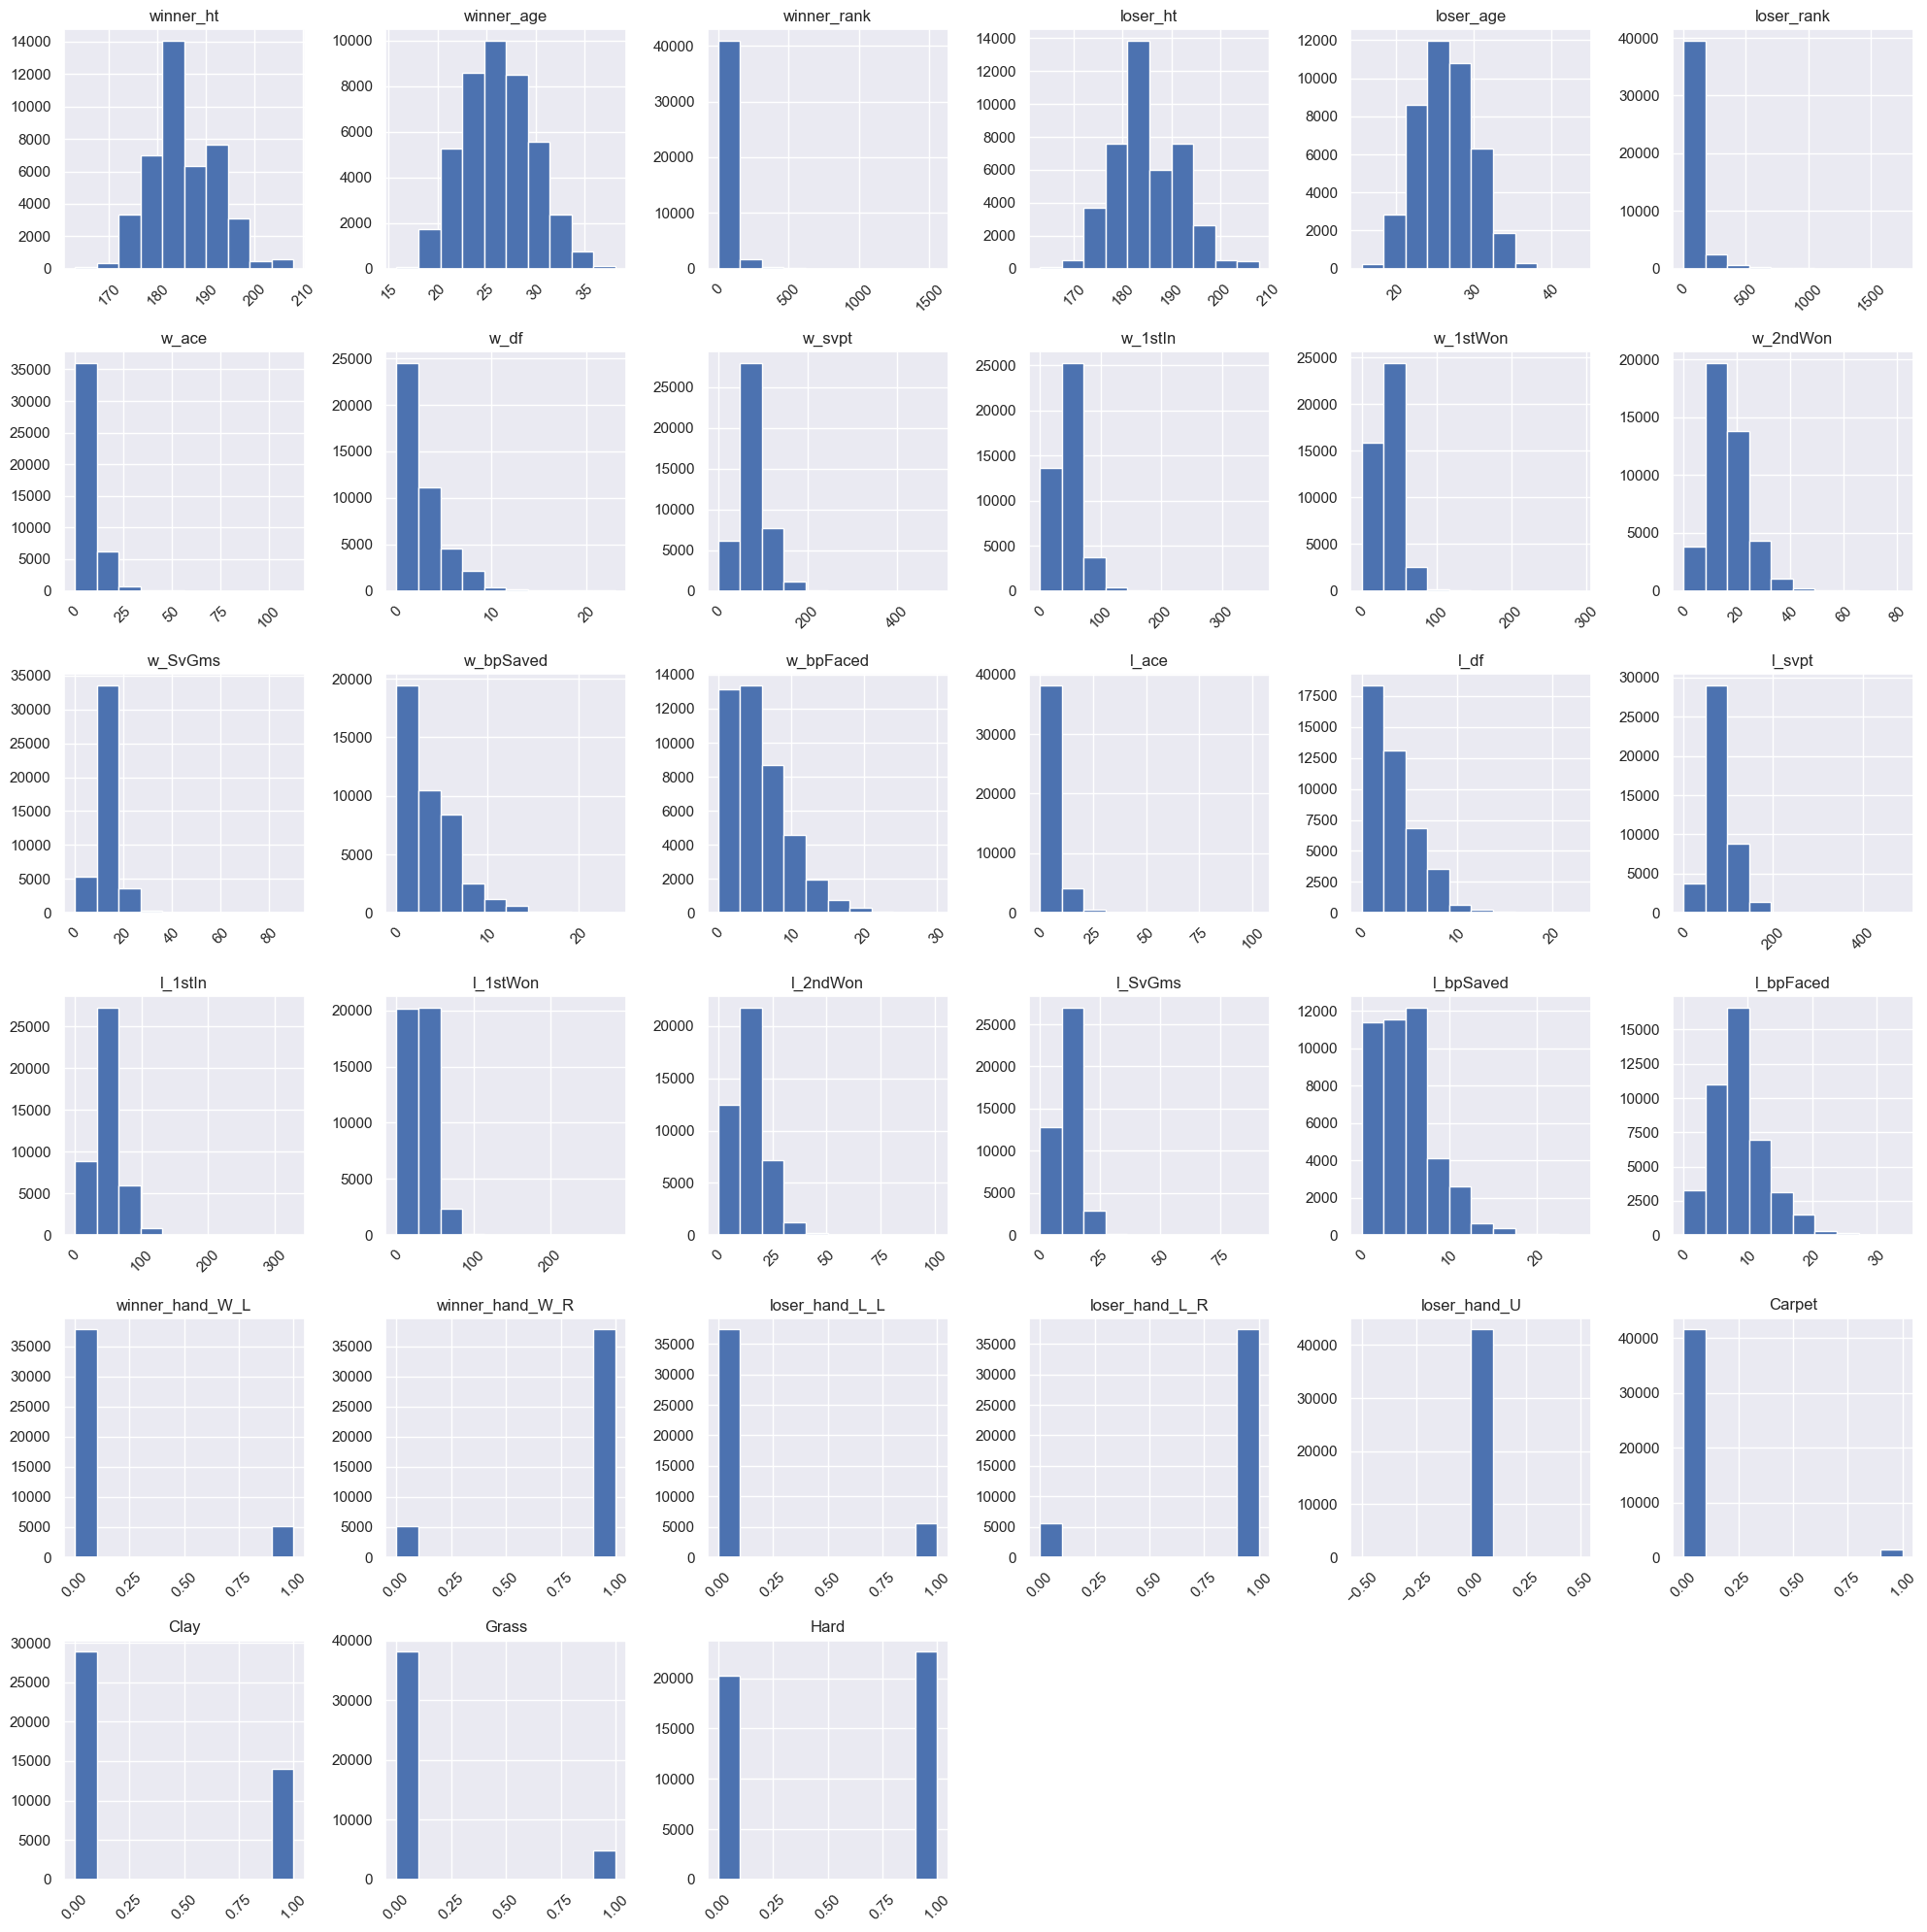

In [85]:
import matplotlib.pyplot as plt
pt = df.hist(figsize=(20,20), xrot=45)
plt.show()

<h1>Data Visualization</h1>

Before we do anything, let's put our dataframe into the same format: float64.

We also don't need the names of the winner and loser as these are variables that don't affect who will win and lose the match. They are simply a label for the player who has some desirable characterstics, which we want to find. 

In [86]:
# df.dtypes
df = df.drop('winner_name', axis=1)
df = df.drop('loser_name', axis=1)


In [87]:
df = df.astype('float64')

In [88]:
df.dtypes

winner_ht          float64
winner_age         float64
winner_rank        float64
loser_ht           float64
loser_age          float64
loser_rank         float64
w_ace              float64
w_df               float64
w_svpt             float64
w_1stIn            float64
w_1stWon           float64
w_2ndWon           float64
w_SvGms            float64
w_bpSaved          float64
w_bpFaced          float64
l_ace              float64
l_df               float64
l_svpt             float64
l_1stIn            float64
l_1stWon           float64
l_2ndWon           float64
l_SvGms            float64
l_bpSaved          float64
l_bpFaced          float64
winner_hand_W_L    float64
winner_hand_W_R    float64
loser_hand_L_L     float64
loser_hand_L_R     float64
loser_hand_U       float64
Carpet             float64
Clay               float64
Grass              float64
Hard               float64
dtype: object

Now all of our data is off the same type: float64

In [89]:
# Double check the shape of the dataframe after casting it and doing some operations on it (make sure that it's the same as before)
df.shape

(42923, 33)

Next, to determine potential variables to explore, we need to find a covariance matrix. The covariance is a statistical figure which can be used to help us understand which variables might be correlated to each other. A visualization of this, the covariance matrix, can be visualized using the scikit-learn library's fit_transform function, and we can then use seaborn to see a figure of our matrix. To learn more about covariance and how to visualize covariance from a dataframe in python, read this article here: https://pub.towardsai.net/covariance-matrix-visualization-using-seaborns-heatmap-plot-64332b6c90c5. 

In [90]:
# Creating a covariance matrix as a python data structure using scikit-learn
cols = df.columns
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(df[cols].iloc[:,range(0,25)].values)
cov_mat = np.cov(X_std.T)

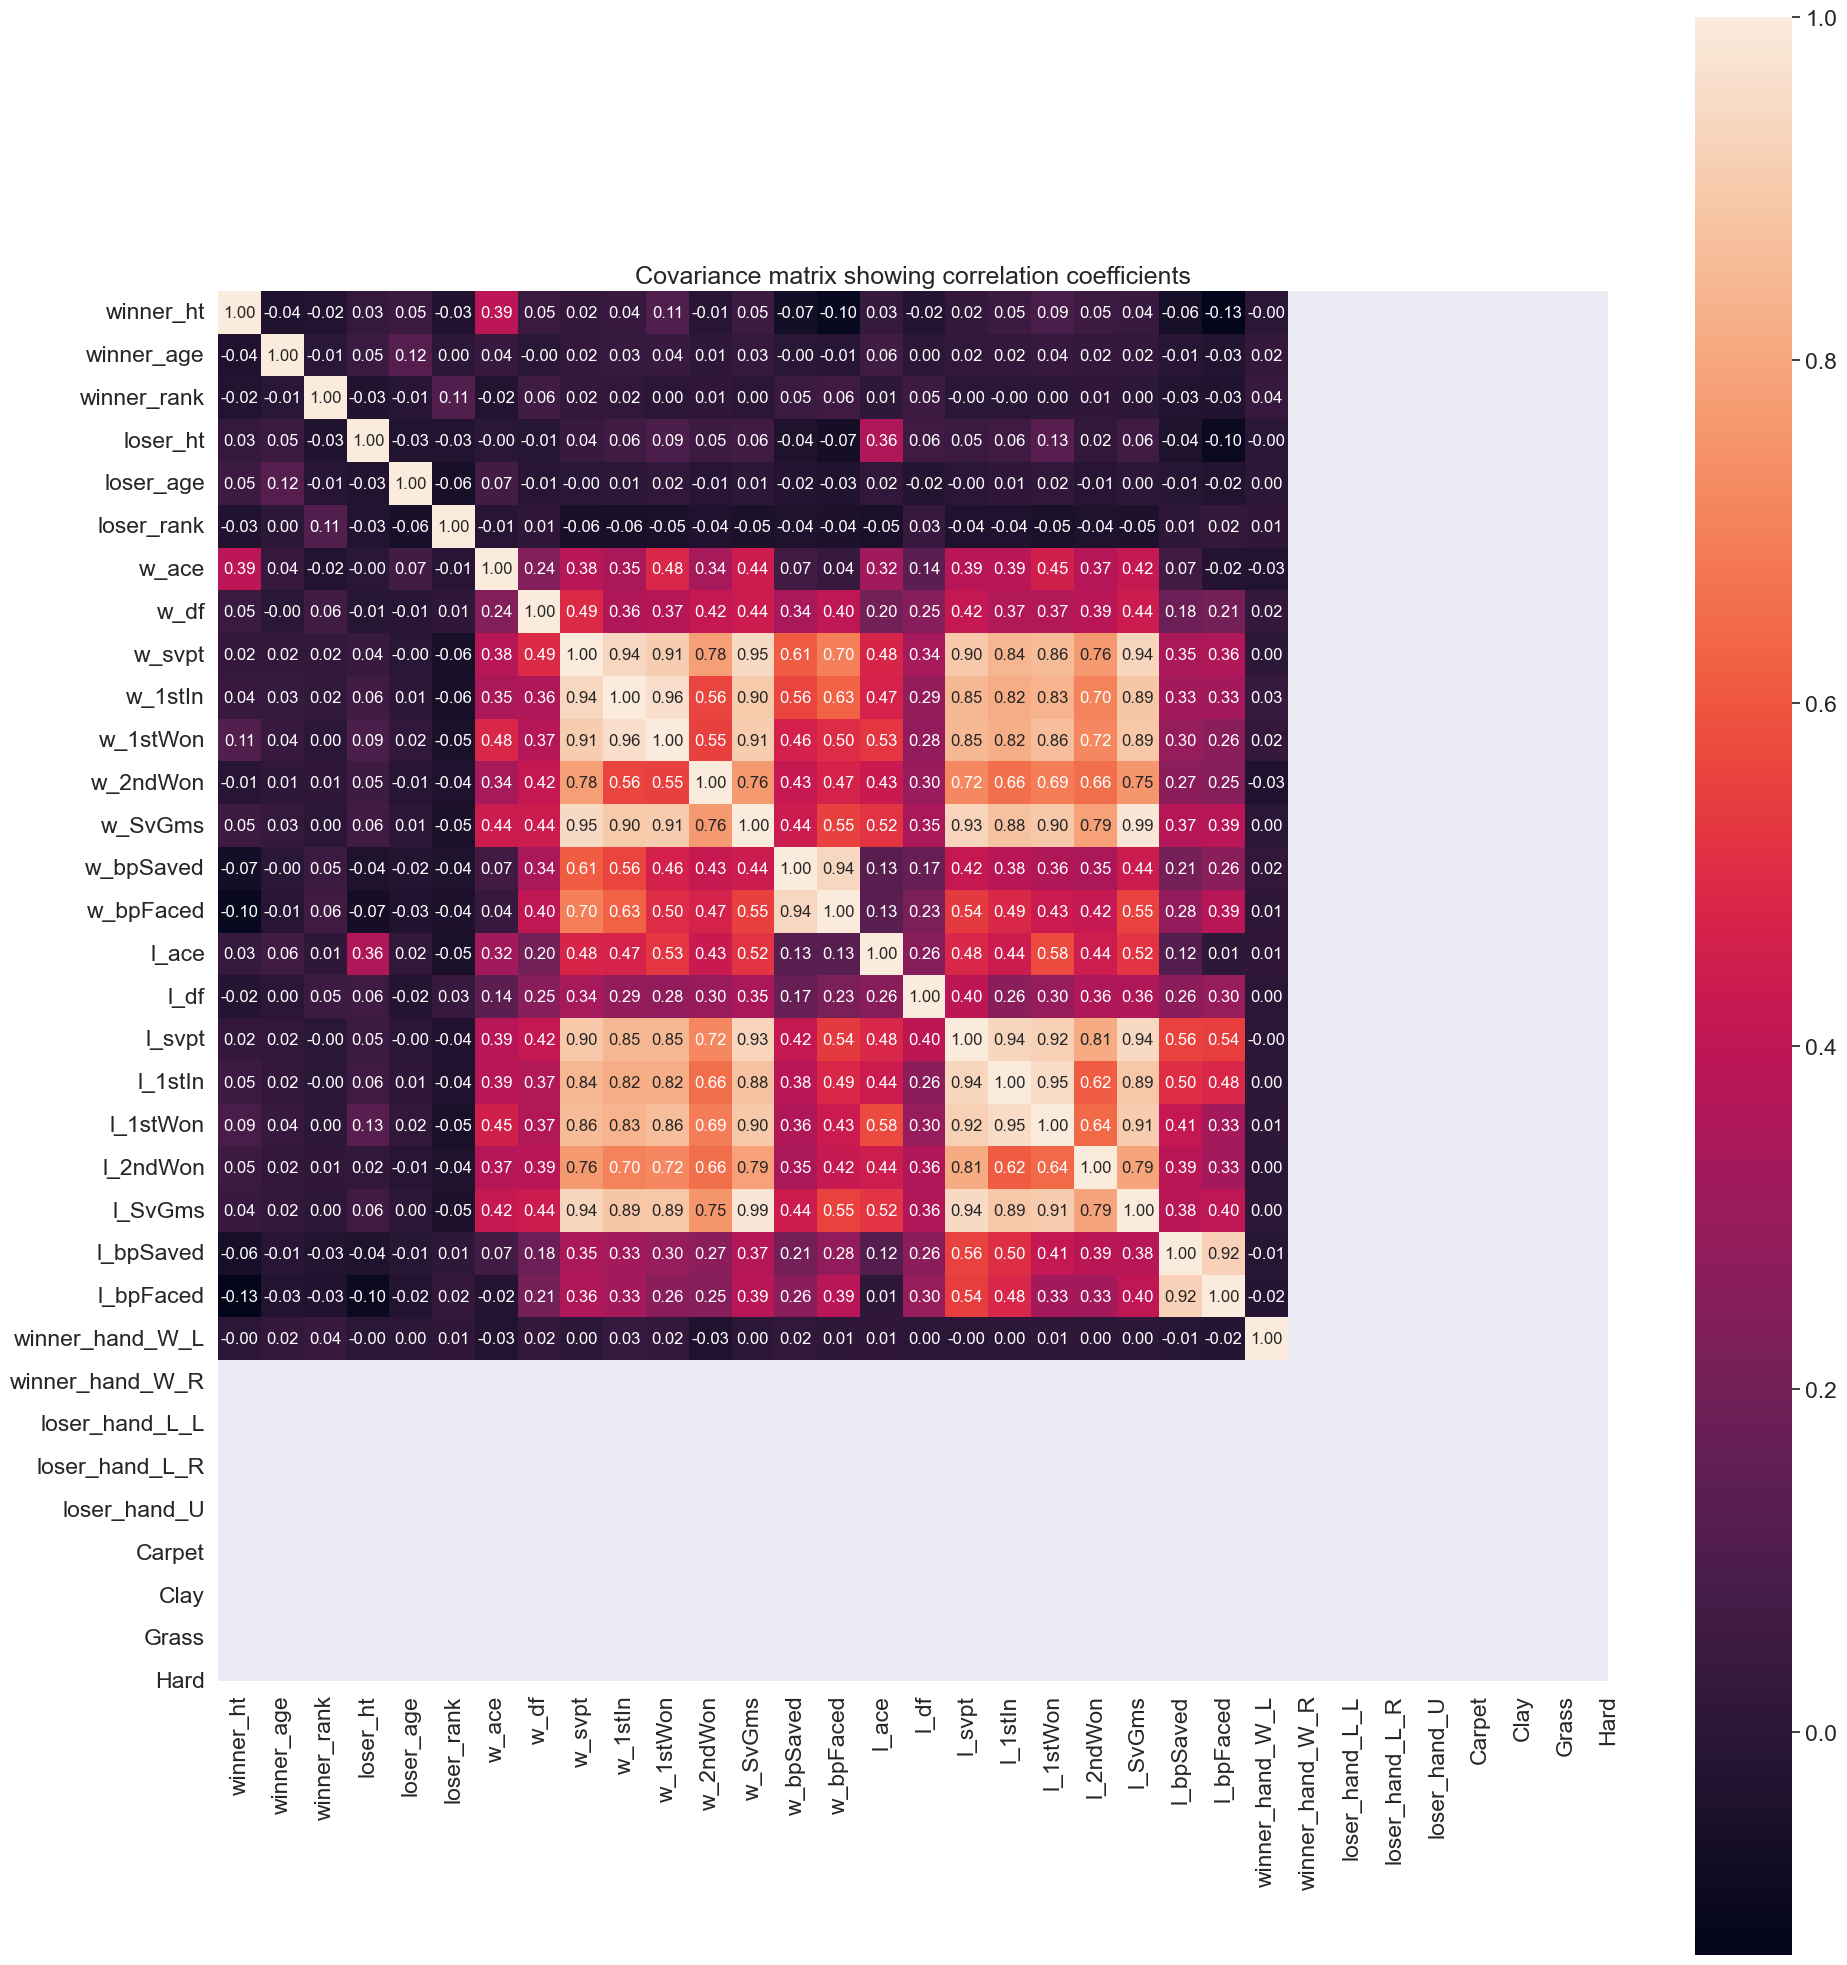

In [91]:
# Displaying the covariance matrix in a viewable format
sns.set_palette('pastel')

plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

In our matrix above, we want to be looking at the most highly correlated meaningful statistics - these are the brightest squares (you might notice that ALL the cells on the diagonal have a covariance of 1, but that is trivial).
<br><br>
From a first glance, some meaningful factors appear to be winner break points faced and break points saved. This makes sense since break points are extremely important in tennis. The ability to hold own's serve with ease is key to relieving stress for the player and allows them to be aggressive in their return games. At the highest level, you must have a strong serve or else you will not win many matches. 

Continuing the theme of serving and its important role in tennis, its also interesting to note how the number of points won on serve and the 1st serve percentage also correlate well. This is something to keep an eye on in our analysis.

The following section has a lot of outliers, so for convenience of viewing, they have been toggled off in the code (through the showfliers=False tag).

The purpose of this section is to further visualize the information we have been provided; which factors make a winner what they are? 

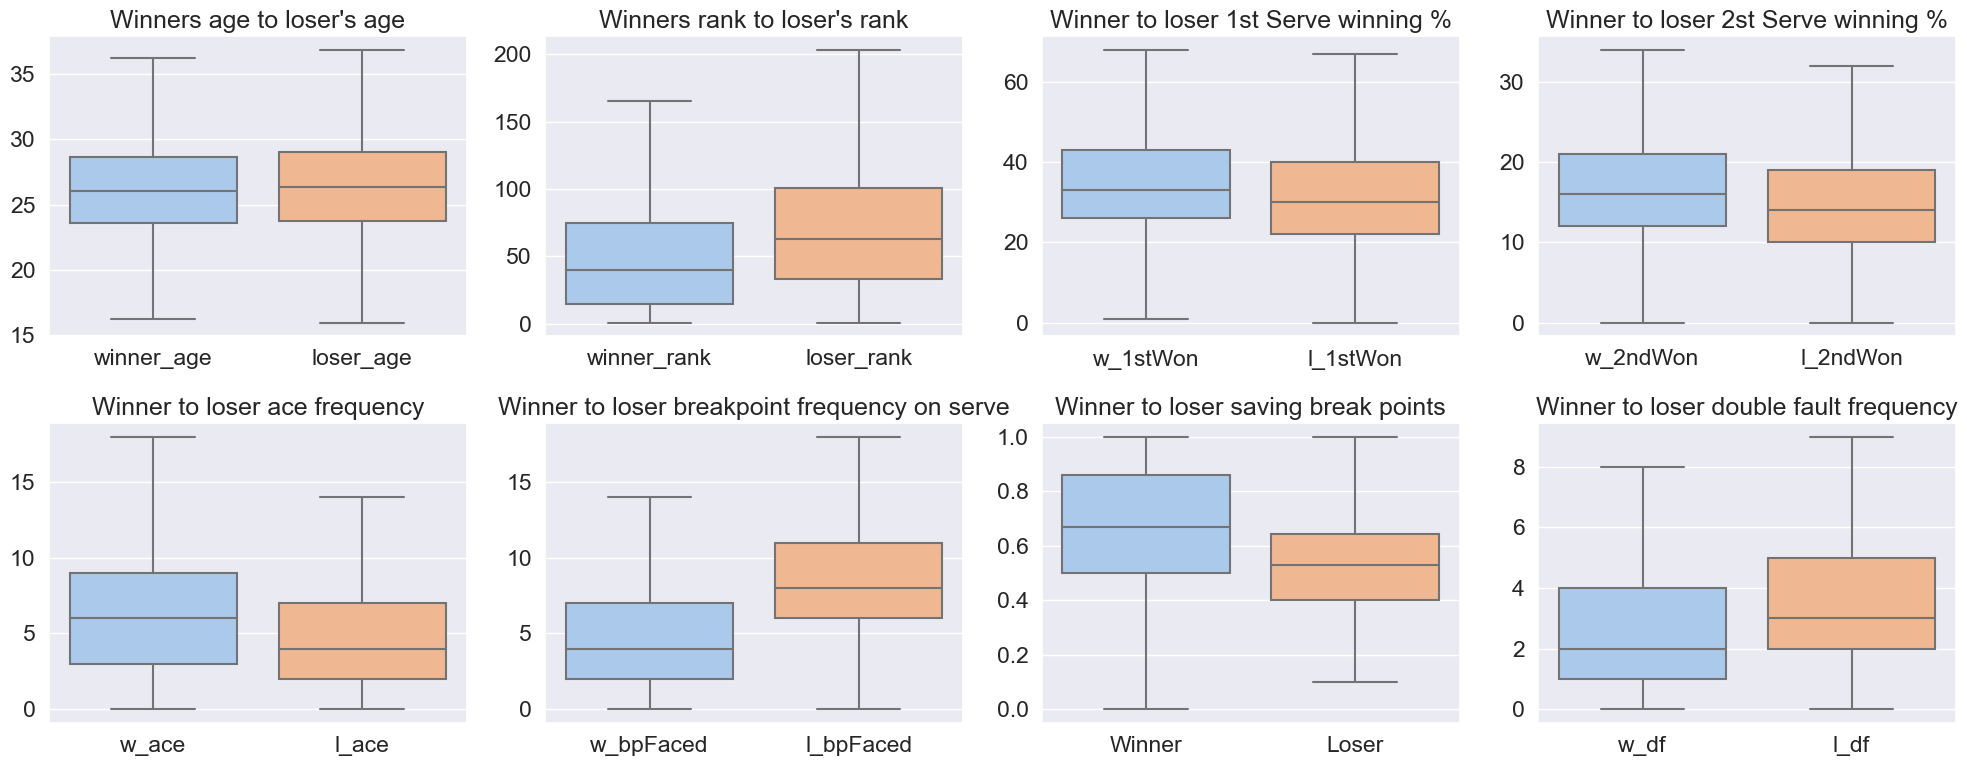

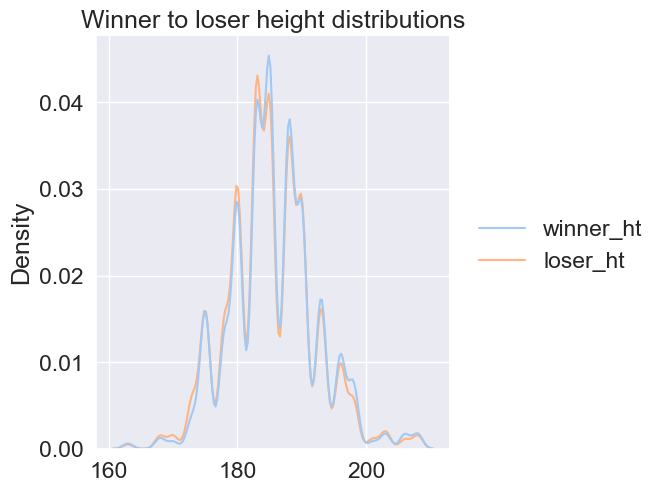

In [92]:
sns.set_palette('pastel')

# Create a grid to put our plots in
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(2, 4, figsize=(20, 8))

# Plot ages
ax = sns.boxplot(data=df[['winner_age', 'loser_age']], ax = axes[0][0], showfliers=False)
ax.set(title="Winners age to loser's age")

# Plot ranks
ax = sns.boxplot(data=df[['winner_rank', 'loser_rank']], ax = axes[0][1], showfliers=False)
ax.set(title="Winners rank to loser's rank")

# Plot 1st serve winning
ax = sns.boxplot(data=df[['w_1stWon', 'l_1stWon']], ax = axes[0][2], showfliers=False)
ax.set(title="Winner to loser 1st Serve winning %")

ax = sns.boxplot(data=df[['w_2ndWon', 'l_2ndWon']], ax = axes[0][3], showfliers=False)
ax.set(title="Winner to loser 2st Serve winning %")

# Post ace percentages
ax = sns.boxplot(data=df[['w_ace', 'l_ace']], ax = axes[1][0], showfliers=False)
ax.set(title="Winner to loser ace frequency")

# Plot break points faced
ax = sns.boxplot(data=df[['w_bpFaced', 'l_bpFaced']], ax = axes[1][1], showfliers=False)
ax.set(title="Winner to loser breakpoint frequency on serve")

# Plot break points saved proportions
winner_proportions = (df['w_bpSaved']/df['w_bpFaced'])
loser_proportions = (df['l_bpSaved']/df['l_bpFaced'])
data = {'Winner': winner_proportions, 'Loser': loser_proportions}
saved_df = pd.DataFrame(data)
ax = sns.boxplot(data=saved_df, ax=axes[1][2], showfliers=False)
ax.set(title="Winner to loser saving break points")

# Plot double fault frequencies
ax = sns.boxplot(data=df[['w_df', 'l_df']], ax = axes[1][3], showfliers=False)
ax.set(title="Winner to loser double fault frequency")

sns.displot(df[['winner_ht', 'loser_ht']], kind='kde').set(title='Winner to loser height distributions')

This graph just analyzes the heights of the winners and losers. It does not have any significant meaning as a player cannot control their height, but it does provide a rough estimate of where tennis players fall in the height distribution.

In [93]:
df.columns

Index(['winner_ht', 'winner_age', 'winner_rank', 'loser_ht', 'loser_age',
       'loser_rank', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon',
       'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df',
       'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved',
       'l_bpFaced', 'winner_hand_W_L', 'winner_hand_W_R', 'loser_hand_L_L',
       'loser_hand_L_R', 'loser_hand_U', 'Carpet', 'Clay', 'Grass', 'Hard'],
      dtype='object')

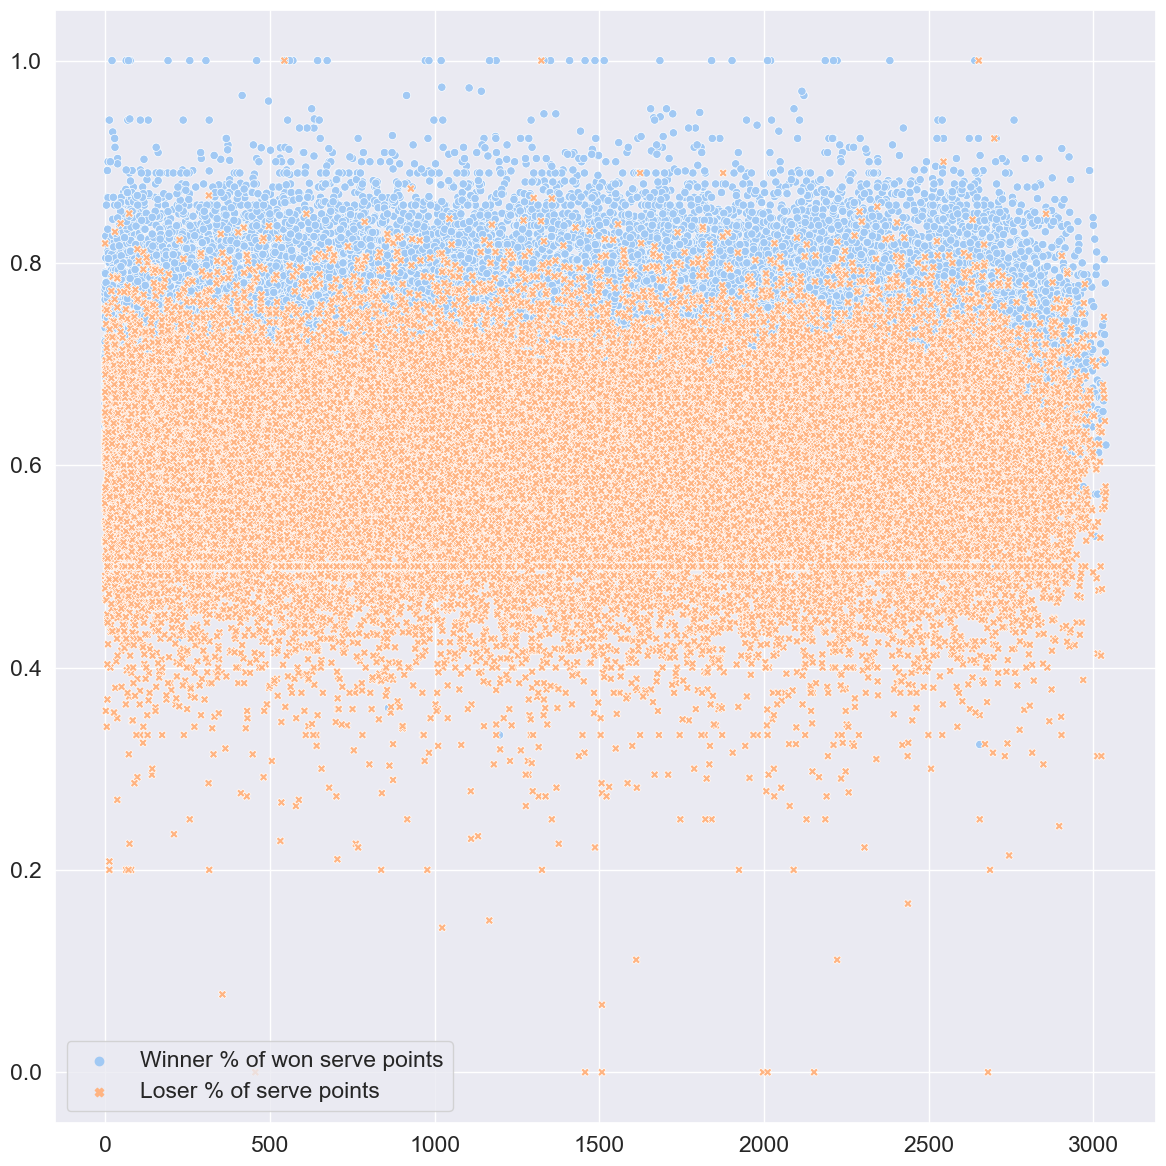

In [94]:
winner_proportions = ((df['w_1stWon']+df['w_2ndWon'])/(df['w_svpt']-df['w_df']))
loser_proportions = ((df['l_1stWon']+df['l_2ndWon'])/(df['l_svpt']-df['l_df']))
data = {'Winner % of won serve points': winner_proportions, 'Loser % of serve points': loser_proportions}
saved_df = pd.DataFrame(data)
ax = sns.scatterplot(data=saved_df)

This is a scatterplot which aims to analyz the proportion of serve points by the winner and loser. Clearly the winner on average wins more serve points, but it is fascinating to see who closely the points are clustered. Tennis is known for its fine margins and this plot supports that concept.

In [95]:
saved_df.describe()

Winner % of won serve points  Loser % of serve points
count                  42916.000000             42915.000000
mean                       0.711841                 0.598190
std                        0.068678                 0.078835
min                        0.323944                 0.000000
25%                        0.663717                 0.551020
50%                        0.708738                 0.601266
75%                        0.756098                 0.649658
max                        1.000000                 1.000000

In [96]:
dfs = [df, saved_df]
df = pd.concat(dfs, axis = 1)
df

winner_ht  winner_age  winner_rank  loser_ht  loser_age  loser_rank  \
0        185.0   27.181383        113.0     180.0  24.035592        50.0   
1        183.0   19.756331        352.0     173.0  23.843943       139.0   
2        185.0   20.881588        103.0     183.0  27.011636       133.0   
3        183.0   30.047912        107.0     196.0  23.260780        95.0   
4        185.0   30.075291         74.0     175.0  29.423682       111.0   
..         ...         ...          ...       ...        ...         ...   
358      190.0   32.941821         68.0     183.0  33.990418        81.0   
359      183.0   33.990418         81.0     183.0  35.126626        43.0   
361      178.0   32.884326         58.0     178.0  33.292266        29.0   
367      193.0   26.606434        133.0     175.0  26.691307        45.0   
384      185.0   24.350445         20.0     185.0  35.389459       146.0   

     w_ace  w_df  w_svpt  w_1stIn  ...  winner_hand_W_R  loser_hand_L_L  \
0      8.0   1.0   126.0     76.0  ...              1.0             0.0   
1      4.0   2.0    67.0     35.0  ...              1.0             0.0   
2      4.0   1.0    46.0     29.0  ...              1.0             0.0   
3      8.0   6.0   109.0     56.0  ...              0.0             0.0   
4      3.0   0.0    50.0     27.0  ...              1.0             0.0   
..     ...   ...     ...      ...  ...              ...             ...   
358    8.0   3.0   123.0     63.0  ...              1.0             0.0   
359    4.0   2.0   140.0     89.0  ...              1.0             0.0   
361    4.0   3.0   165.0    112.0  ...              1.0             0.0   
367   25.0   4.0   152.0     93.0  ...              1.0             0.0   
384   12.0   1.0    83.0     50.0  ...              1.0             0.0   

     loser_hand_L_R  loser_hand_U  Carpet  Clay  Grass  Hard  \
0               1.0           0.0     0.0   1.0    0.0   0.0   
1               1.0           0.0     0.0   1.0    0.0   0.0   
2               1.0           0.0     0.0   1.0    0.0   0.0   
3               1.0           0.0     0.0   1.0    0.0   0.0   
4               1.0           0.0     0.0   1.0    0.0   0.0   
..              ...           ...     ...   ...    ...   ...   
358             1.0           0.0     0.0   1.0    0.0   0.0   
359             1.0           0.0     0.0   1.0    0.0   0.0   
361             1.0           0.0     0.0   0.0    0.0   1.0   
367             1.0           0.0     0.0   0.0    0.0   1.0   
384             1.0           0.0     0.0   0.0    0.0   1.0   

     Winner % of won serve points  Loser % of serve points  
0                        0.680000                 0.754717  
1                        0.630769                 0.526316  
2                        0.755556                 0.507937  
3                        0.621359                 0.602041  
4                        0.760000                 0.613636  
..                            ...                      ...  
358                      0.608333                 0.563636  
359                      0.659420                 0.604167  
361                      0.635802                 0.662500  
367                      0.648649                 0.617450  
384                      0.719512                 0.610390  

[42923 rows x 35 columns]

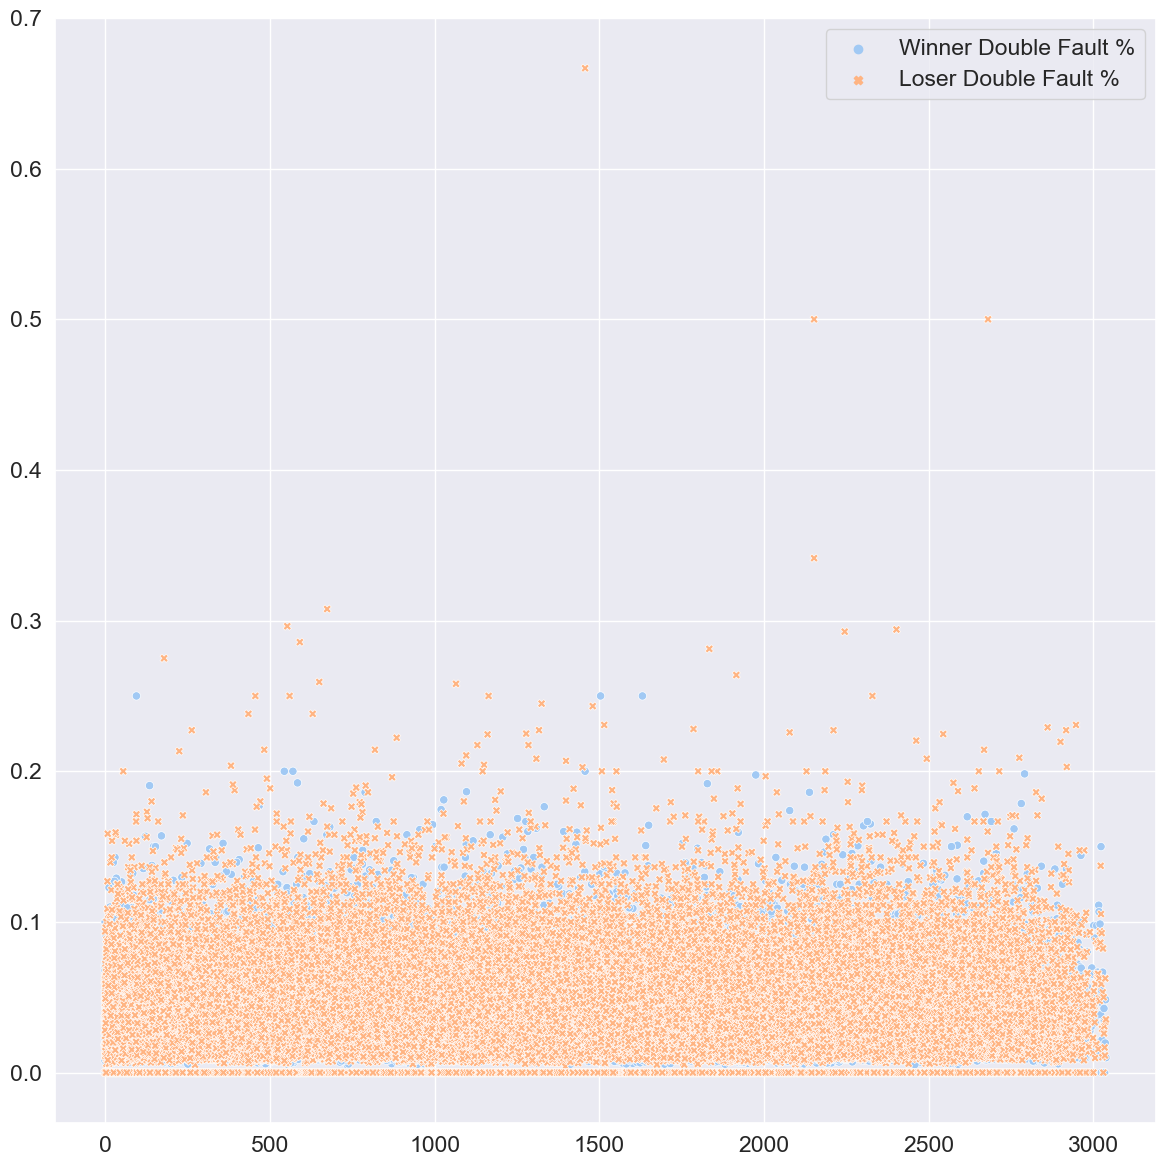

In [97]:
winner_proportions = (df['w_df']/df['w_svpt'])
loser_proportions = (df['l_df']/df['l_svpt'])
data = {'Winner Double Fault %': winner_proportions, 'Loser Double Fault %': loser_proportions}
df_df = pd.DataFrame(data)
ax = sns.scatterplot(data=df_df)

This is a scatterplot which shows the proportion of double faults by the winner and loser. 

In [98]:
df_df.describe()

Winner Double Fault %  Loser Double Fault %
count           42916.000000          42915.000000
mean                0.033172              0.043003
std                 0.025653              0.031030
min                 0.000000              0.000000
25%                 0.015152              0.020408
50%                 0.029412              0.037975
75%                 0.047619              0.058824
max                 0.250000              0.666667

In [99]:
dfs = [df, df_df]
df = pd.concat(dfs, axis = 1)
df

winner_ht  winner_age  winner_rank  loser_ht  loser_age  loser_rank  \
0        185.0   27.181383        113.0     180.0  24.035592        50.0   
1        183.0   19.756331        352.0     173.0  23.843943       139.0   
2        185.0   20.881588        103.0     183.0  27.011636       133.0   
3        183.0   30.047912        107.0     196.0  23.260780        95.0   
4        185.0   30.075291         74.0     175.0  29.423682       111.0   
..         ...         ...          ...       ...        ...         ...   
358      190.0   32.941821         68.0     183.0  33.990418        81.0   
359      183.0   33.990418         81.0     183.0  35.126626        43.0   
361      178.0   32.884326         58.0     178.0  33.292266        29.0   
367      193.0   26.606434        133.0     175.0  26.691307        45.0   
384      185.0   24.350445         20.0     185.0  35.389459       146.0   

     w_ace  w_df  w_svpt  w_1stIn  ...  loser_hand_L_R  loser_hand_U  Carpet  \
0      8.0   1.0   126.0     76.0  ...             1.0           0.0     0.0   
1      4.0   2.0    67.0     35.0  ...             1.0           0.0     0.0   
2      4.0   1.0    46.0     29.0  ...             1.0           0.0     0.0   
3      8.0   6.0   109.0     56.0  ...             1.0           0.0     0.0   
4      3.0   0.0    50.0     27.0  ...             1.0           0.0     0.0   
..     ...   ...     ...      ...  ...             ...           ...     ...   
358    8.0   3.0   123.0     63.0  ...             1.0           0.0     0.0   
359    4.0   2.0   140.0     89.0  ...             1.0           0.0     0.0   
361    4.0   3.0   165.0    112.0  ...             1.0           0.0     0.0   
367   25.0   4.0   152.0     93.0  ...             1.0           0.0     0.0   
384   12.0   1.0    83.0     50.0  ...             1.0           0.0     0.0   

     Clay  Grass  Hard  Winner % of won serve points  Loser % of serve points  \
0     1.0    0.0   0.0                      0.680000                 0.754717   
1     1.0    0.0   0.0                      0.630769                 0.526316   
2     1.0    0.0   0.0                      0.755556                 0.507937   
3     1.0    0.0   0.0                      0.621359                 0.602041   
4     1.0    0.0   0.0                      0.760000                 0.613636   
..    ...    ...   ...                           ...                      ...   
358   1.0    0.0   0.0                      0.608333                 0.563636   
359   1.0    0.0   0.0                      0.659420                 0.604167   
361   0.0    0.0   1.0                      0.635802                 0.662500   
367   0.0    0.0   1.0                      0.648649                 0.617450   
384   0.0    0.0   1.0                      0.719512                 0.610390   

     Winner Double Fault %  Loser Double Fault %  
0                 0.007937              0.036364  
1                 0.029851              0.000000  
2                 0.021739              0.030769  
3                 0.055046              0.057692  
4                 0.000000              0.063830  
..                     ...                   ...  
358               0.024390              0.017857  
359               0.014286              0.020408  
361               0.018182              0.006211  
367               0.026316              0.013245  
384               0.012048              0.060976  

[42923 rows x 37 columns]

The numbers in the scatter plots and data aren't quite what we expected, but they are useful to our analysis. What does follow our expectations is that winners tend to win more service points than losers.


# Hypothesis Testing

We decided to perform feature selection using an ANOVA F-Test. The ANOVA F-Test tells us if there's a significant relationship between a numeric variable and a categorical variable. We want to see if there is a relationship between match statistics (numeric) and the classification target variable (categorical). Since the ANOVA F-Test tells us which variables have a significant relationship with the match result, we are able to select significant features in prediction match results. Below our null and alternate hypotheses to begin our experiment.

Null Hypothesis: There is no relationship between the two variables.

Alternative Hypothesis: There is a relationship between the two variables

The code uses the train_test_split function from scikit-learn to split the data into training and testing sets. First, the data is converted into a numpy array using the values attribute of the Pandas DataFrame.

The x variable contains all columns except the first and last two columns of the data, which are assumed to be the target variable and any unused features. The y variable contains the values in the first column of the data as integers.

The train_test_split function is called with the input and output variables, a test_size of 0.2 (meaning 20% of the data will be used for testing), and a random_state of 42 (to ensure reproducibility of the split). The resulting training and testing sets are stored in separate variables.

Finally, the code prints the number of data points in the training and testing sets, as well as the unique class labels in the y variable

In [100]:
# T-Test
# ANOVA F-Test

from sklearn.model_selection import train_test_split

#Use the train_test_split module to split our data

# retrieve numpy array
dataset = df.values

# split into input and output variables
x = dataset[:, 1:-2]
y = dataset[:,0].astype('int')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# summarize

print("# of training data points: %d" % x_train.shape[0])
print("# of testing data points: %d" % x_test.shape[0])
print("Class labels:", np.unique(y))

# of training data points: 34338
# of testing data points: 8585
Class labels: [163 168 170 172 173 175 178 180 181 183 185 188 190 193 194 196 198 201
 203 206 208]


In [101]:
df.columns

Index(['winner_ht', 'winner_age', 'winner_rank', 'loser_ht', 'loser_age',
       'loser_rank', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon',
       'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df',
       'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved',
       'l_bpFaced', 'winner_hand_W_L', 'winner_hand_W_R', 'loser_hand_L_L',
       'loser_hand_L_R', 'loser_hand_U', 'Carpet', 'Clay', 'Grass', 'Hard',
       'Winner % of won serve points', 'Loser % of serve points',
       'Winner Double Fault %', 'Loser Double Fault %'],
      dtype='object')

In [102]:
df.isnull().sum().sum()/df.size
df = df.dropna()

The following code imports the pandas library as 'pd' and the 'train_test_split' function from the scikit-learn library. It selects the 'w_ace' column from the 'df' DataFrame and assigns it to the variable 'y'. This is the variable we are going to analyze 
It creates a new DataFrame called 'X' by selecting specific columns from the 'df' DataFrame.
It generates random values for the 'random' column of the 'X' DataFrame.
It splits the data into training and validation sets using the train_test_split() function. The training data is assigned to 'X_train' and 'y_train', while the validation data is assigned to 'X_valid' and 'y_valid'.


We chose to predict the number of aces a winner will serve during a match as it is a good dependent variable which we have a lot of data available for, and we know is a factor somewhat correlated due to our heatmap above.

In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split

y = df['w_ace'] #RIGHT HERE
X = pd.DataFrame(df, columns = ['winner_ht', 'winner_age', 'winner_rank', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved',
       'w_bpFaced', 'random', 'Carpet', 'Clay', 'Grass', 'Hard',
       'Winner % of won serve points', 'Loser % of serve points',
       'Winner Double Fault %', 'Loser Double Fault %'])
np.random.seed(seed = 42)
X['random'] = np.random.random(size = len(X))
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [104]:
X_train

winner_ht  winner_age  winner_rank  w_df  w_svpt  w_1stIn  w_1stWon  \
2029      190.0   23.310062        137.0   5.0    94.0     52.0      32.0   
471       183.0   21.240246        142.0   0.0    56.0     32.0      21.0   
2590      183.0   28.073922         22.0   3.0   115.0     71.0      53.0   
207       185.0   24.796715         54.0   3.0   110.0     55.0      43.0   
1392      180.0   32.501027         66.0   2.0   125.0     65.0      49.0   
...         ...         ...          ...   ...     ...      ...       ...   
700       185.0   22.754278         44.0   1.0    67.0     47.0      31.0   
292       180.0   34.491444          7.0   1.0    83.0     55.0      40.0   
857       183.0   29.045859          3.0   1.0    34.0     23.0      18.0   
914       175.0   21.697467         78.0   4.0    79.0     48.0      30.0   
2158      188.0   22.461328          3.0   1.0    78.0     55.0      44.0   

      w_2ndWon  w_SvGms  w_bpSaved  w_bpFaced    random  Carpet  Clay  Grass  \
2029      16.0     14.0        4.0       10.0  0.516848     0.0   0.0    0.0   
471       17.0     10.0        0.0        1.0  0.359999     0.0   0.0    0.0   
2590      25.0     17.0        6.0        8.0  0.482316     0.0   0.0    0.0   
207       26.0     12.0        9.0       12.0  0.578141     1.0   0.0    0.0   
1392      37.0     18.0        6.0        7.0  0.013986     0.0   0.0    0.0   
...        ...      ...        ...        ...       ...     ...   ...    ...   
700       10.0      9.0        6.0        7.0  0.500877     0.0   0.0    0.0   
292       16.0     12.0        5.0        6.0  0.879721     0.0   0.0    0.0   
857       10.0      7.0        0.0        0.0  0.393821     0.0   1.0    0.0   
914       16.0     10.0        8.0       11.0  0.775528     0.0   1.0    0.0   
2158      16.0     12.0        4.0        4.0  0.210462     0.0   0.0    0.0   

      Hard  Winner % of won serve points  Loser % of serve points  \
2029   1.0                      0.539326                 0.550000   
471    1.0                      0.678571                 0.639344   
2590   1.0                      0.696429                 0.681034   
207    0.0                      0.644860                 0.620690   
1392   1.0                      0.699187                 0.642857   
...    ...                           ...                      ...   
700    1.0                      0.621212                 0.535714   
292    1.0                      0.682927                 0.640449   
857    0.0                      0.848485                 0.428571   
914    0.0                      0.613333                 0.533333   
2158   1.0                      0.779221                 0.684211   

      Winner Double Fault %  Loser Double Fault %  
2029               0.053191              0.056604  
471                0.000000              0.115942  
2590               0.026087              0.016949  
207                0.027273              0.000000  
1392               0.016000              0.017544  
...                     ...                   ...  
700                0.014925              0.096774  
292                0.012048              0.032609  
857                0.029412              0.027778  
914                0.050633              0.013158  
2158               0.012821              0.040404  

[30039 rows x 20 columns]

We fit the RandomForestRegressor model to the training data using the 'fit' method, with 'X_train' as the input features and 'y_train' as the target variable.
It prints the training R^2 score, the out-of-bag (OOB) score, and the validation R^2 score using the 'score' method of the RandomForestRegressor object. 

Training R^2 score represents the model's performance on the training data. The
OOB score estimates the model's performance using out-of-bag samples. The
Validation R^2 score measures the model's performance on the validation data.

In [105]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 150,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, y_train)

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train, y_train), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(X_valid, y_valid)))

R^2 Training Score: 0.93 
OOB Score: 0.50 
R^2 Validation Score: 0.51


In [106]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

perm_imp_rfpimp = permutation_importances(rf, X_train, y_train, r2)

Here we print out the feature importances we received from our model using the permutation importances prediction module. An important feature, when permuted, will cause a significant decrease in the model's performance, indicating that the model heavily relies on that feature for making accurate predictions. 

In [107]:
perm_imp_rfpimp

Importance
Feature                                 
w_1stWon                        0.750639
winner_ht                       0.441957
Winner % of won serve points    0.397995
Clay                            0.163610
w_1stIn                         0.157716
w_2ndWon                        0.106801
Loser % of serve points         0.106719
w_svpt                          0.103256
winner_age                      0.061434
winner_rank                     0.060554
random                          0.057177
Loser Double Fault %            0.052967
Winner Double Fault %           0.051709
w_SvGms                         0.045749
w_bpFaced                       0.024362
w_bpSaved                       0.022036
w_df                            0.011356
Hard                            0.005502
Grass                           0.003580
Carpet                          0.001827

In [108]:
perm_imp_rfpimp = perm_imp_rfpimp.reset_index()
perm_imp_rfpimp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Feature     20 non-null     object 
 1   Importance  20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


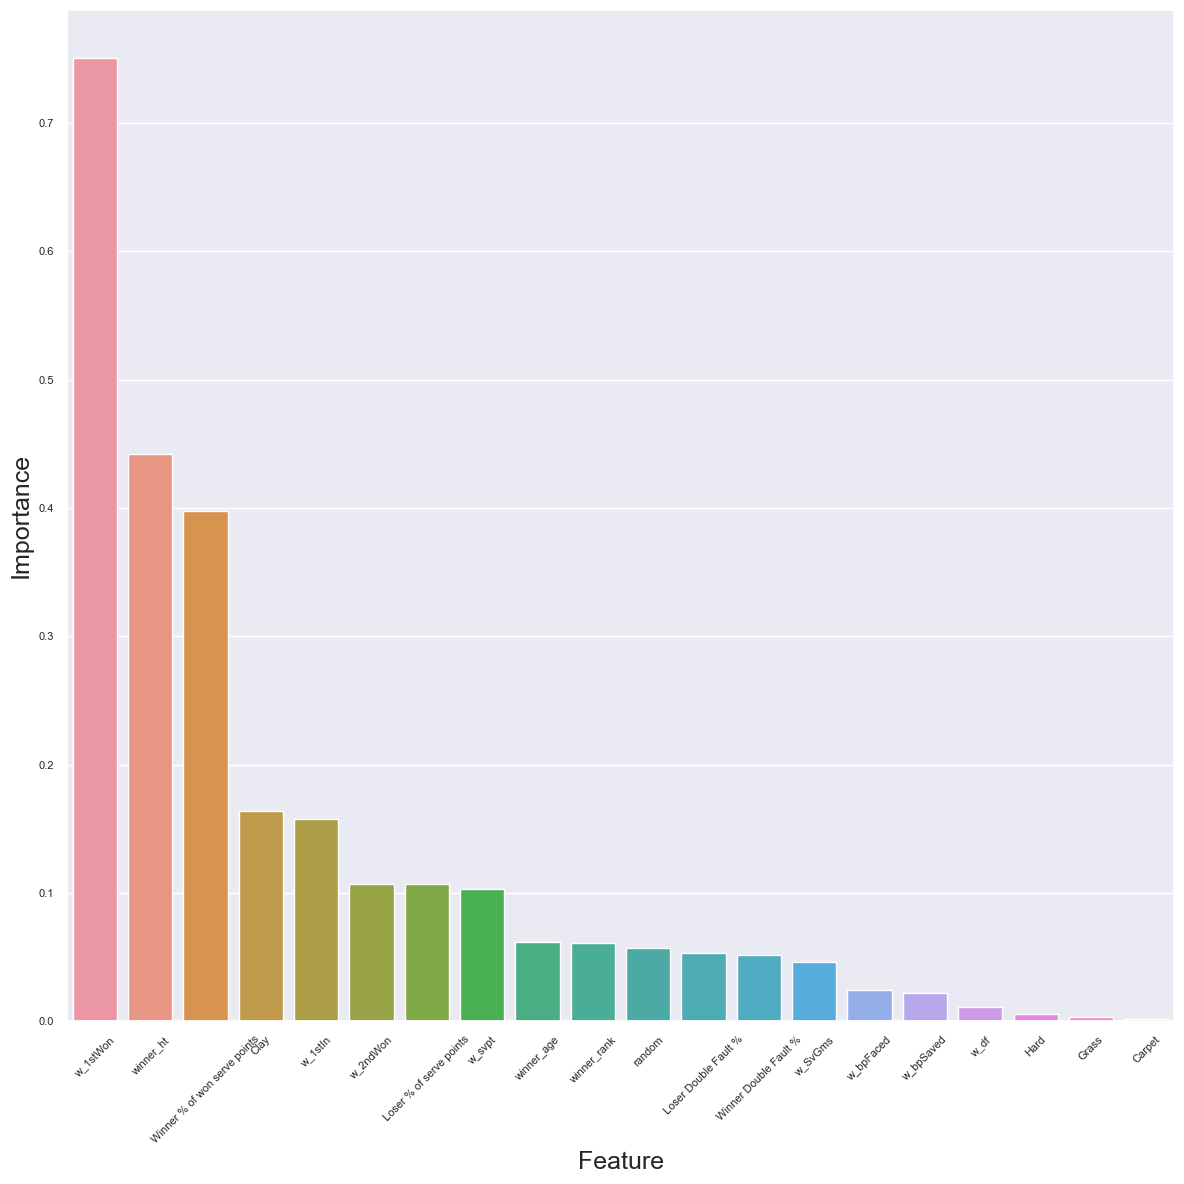

In [109]:
# sns.set_palette('pastel')
# to_graph = pd.DataFrame(arr, columns=['Feature', 'Importance'])
# sns.set(rc={'figure.figsize':(15,15)})
# sns.barplot(x=to_graph['Feature'], y=to_graph['Importance'])
graph = sns.barplot(x=perm_imp_rfpimp['Feature'], y=perm_imp_rfpimp['Importance'])
sns.set(rc={'figure.figsize':(12,12)})
plt.xticks(rotation=45)
graph.tick_params(labelsize=8)


From the above graph, we can see the feature importance score according to the ANOVA F-test. The mst important factors to measure appear to be the % of first serves won, height, % of serves points won in general, % of first serves in, % of second serves won, and age. We can discard the surface being clay since our dataset is biased towards the surface being clay, so obviously we have more data points on there.

We can also see that some features such as player dexterity, age, breakpoints faced seem to have almost an insignificant impact on the outcome of the match. According to this table, we can drop some columns of our dataframe and narrow down the features we are most interested in fitting our model to.

<h1>Machine Learning</h1>

First we will look at our data frame head to see what we are dealing with.

In [110]:
df.head()

winner_ht  winner_age  winner_rank  loser_ht  loser_age  loser_rank  w_ace  \
0      185.0   27.181383        113.0     180.0  24.035592        50.0    8.0   
1      183.0   19.756331        352.0     173.0  23.843943       139.0    4.0   
2      185.0   20.881588        103.0     183.0  27.011636       133.0    4.0   
3      183.0   30.047912        107.0     196.0  23.260780        95.0    8.0   
4      185.0   30.075291         74.0     175.0  29.423682       111.0    3.0   

   w_df  w_svpt  w_1stIn  ...  loser_hand_L_R  loser_hand_U  Carpet  Clay  \
0   1.0   126.0     76.0  ...             1.0           0.0     0.0   1.0   
1   2.0    67.0     35.0  ...             1.0           0.0     0.0   1.0   
2   1.0    46.0     29.0  ...             1.0           0.0     0.0   1.0   
3   6.0   109.0     56.0  ...             1.0           0.0     0.0   1.0   
4   0.0    50.0     27.0  ...             1.0           0.0     0.0   1.0   

   Grass  Hard  Winner % of won serve points  Loser % of serve points  \
0    0.0   0.0                      0.680000                 0.754717   
1    0.0   0.0                      0.630769                 0.526316   
2    0.0   0.0                      0.755556                 0.507937   
3    0.0   0.0                      0.621359                 0.602041   
4    0.0   0.0                      0.760000                 0.613636   

   Winner Double Fault %  Loser Double Fault %  
0               0.007937              0.036364  
1               0.029851              0.000000  
2               0.021739              0.030769  
3               0.055046              0.057692  
4               0.000000              0.063830  

[5 rows x 37 columns]

We want to use variance inflation factor with our data. It is a measure of the amount of multicollinearity in regression analysis (as explained by Investopedia: https://www.investopedia.com/terms/v/variance-inflation-factor.asp). 

This Penn State link explaints it well with an example: https://online.stat.psu.edu/stat462/node/180/.

Essentally, we need to see how much multicollinearity will be an issue for us.

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [112]:
X = df.loc[:, df.columns != 'w_ace']
y = df['w_ace']

In [113]:
vif  = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["predictor"] = X.columns

/Users/mukunds/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/mukunds/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [114]:
vif

VIF Factor                     predictor
0     1.134959                     winner_ht
1     1.031203                    winner_age
2     1.044735                   winner_rank
3     1.208028                      loser_ht
4     1.028227                     loser_age
5     1.034275                    loser_rank
6    10.739158                          w_df
7   224.615461                        w_svpt
8    41.329145                       w_1stIn
9   123.998059                      w_1stWon
10   37.977988                      w_2ndWon
11   67.240580                       w_SvGms
12   34.908152                     w_bpSaved
13   53.831384                     w_bpFaced
14    2.270725                         l_ace
15    9.086078                          l_df
16  165.876667                        l_svpt
17   32.463603                       l_1stIn
18  131.562031                      l_1stWon
19   36.110525                      l_2ndWon
20   68.992944                       l_SvGms
21   40.583832                     l_bpSaved
22   57.987006                     l_bpFaced
23         inf               winner_hand_W_L
24         inf               winner_hand_W_R
25         inf                loser_hand_L_L
26         inf                loser_hand_L_R
27         NaN                  loser_hand_U
28         inf                        Carpet
29         inf                          Clay
30         inf                         Grass
31         inf                          Hard
32    7.051684  Winner % of won serve points
33    6.577546       Loser % of serve points
34    7.707932         Winner Double Fault %
35    6.841490          Loser Double Fault %

The below predictors seem to be least impacted by multicollinearity so they are good predictors to look at. Small VIF values, VIF < 3, indicate low correlation among variables under ideal conditions. Many sources say that a VIF of less than 10 is acceptable so we decided to use that as our cutoff.

In [115]:
vif = vif[vif['VIF Factor'] <= 10]
vif

VIF Factor                     predictor
0     1.134959                     winner_ht
1     1.031203                    winner_age
2     1.044735                   winner_rank
3     1.208028                      loser_ht
4     1.028227                     loser_age
5     1.034275                    loser_rank
14    2.270725                         l_ace
15    9.086078                          l_df
32    7.051684  Winner % of won serve points
33    6.577546       Loser % of serve points
34    7.707932         Winner Double Fault %
35    6.841490          Loser Double Fault %

In [116]:
df.head()

winner_ht  winner_age  winner_rank  loser_ht  loser_age  loser_rank  w_ace  \
0      185.0   27.181383        113.0     180.0  24.035592        50.0    8.0   
1      183.0   19.756331        352.0     173.0  23.843943       139.0    4.0   
2      185.0   20.881588        103.0     183.0  27.011636       133.0    4.0   
3      183.0   30.047912        107.0     196.0  23.260780        95.0    8.0   
4      185.0   30.075291         74.0     175.0  29.423682       111.0    3.0   

   w_df  w_svpt  w_1stIn  ...  loser_hand_L_R  loser_hand_U  Carpet  Clay  \
0   1.0   126.0     76.0  ...             1.0           0.0     0.0   1.0   
1   2.0    67.0     35.0  ...             1.0           0.0     0.0   1.0   
2   1.0    46.0     29.0  ...             1.0           0.0     0.0   1.0   
3   6.0   109.0     56.0  ...             1.0           0.0     0.0   1.0   
4   0.0    50.0     27.0  ...             1.0           0.0     0.0   1.0   

   Grass  Hard  Winner % of won serve points  Loser % of serve points  \
0    0.0   0.0                      0.680000                 0.754717   
1    0.0   0.0                      0.630769                 0.526316   
2    0.0   0.0                      0.755556                 0.507937   
3    0.0   0.0                      0.621359                 0.602041   
4    0.0   0.0                      0.760000                 0.613636   

   Winner Double Fault %  Loser Double Fault %  
0               0.007937              0.036364  
1               0.029851              0.000000  
2               0.021739              0.030769  
3               0.055046              0.057692  
4               0.000000              0.063830  

[5 rows x 37 columns]

# In the following section, we are flattening data to combat multilinearity. 
This is the project from where we got the inspiration: https://jbhender.github.io/Stats506/F17/Projects/G13/Python.html

We need to battle the multilineary of the factors. We learn that an Ordinary Least Squares (OLS) regression will help. This further explains OLS: https://en.wikipedia.org/wiki/Ordinary_least_squares.

In [117]:
from sklearn.linear_model import Ridge

In [118]:
# Perform OLS on the new dataframe
import statsmodels.api as sm
X_ols = df[vif['predictor']]
y_ols = y
X_ols = sm.add_constant(X_ols)
model_ols = sm.OLS(y_ols, X_ols).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  w_ace   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     2091.
Date:                Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                        10:40:57   Log-Likelihood:            -1.2401e+05
No. Observations:               42913   AIC:                         2.481e+05
Df Residuals:                   42900   BIC:                         2.482e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

# OLS on our dataset

Our data was quite skewed and this could cause a biased result, so we have chosen to do ridge regularization transform to reduce multilinearity. More information on how this is done can be found by reading this article: https://refactored.ai/microcourse/notebook?path=content%2F05-Regression_models_in_Machine_Learning%2F05-Regularization%2F03-Lab-Regularization_guided.ipynb.

This is us performting the ridge regression, which we need to continue to battle multilinearity. This continues from this source: https://jbhender.github.io/Stats506/F17/Projects/G13/Python.html. 

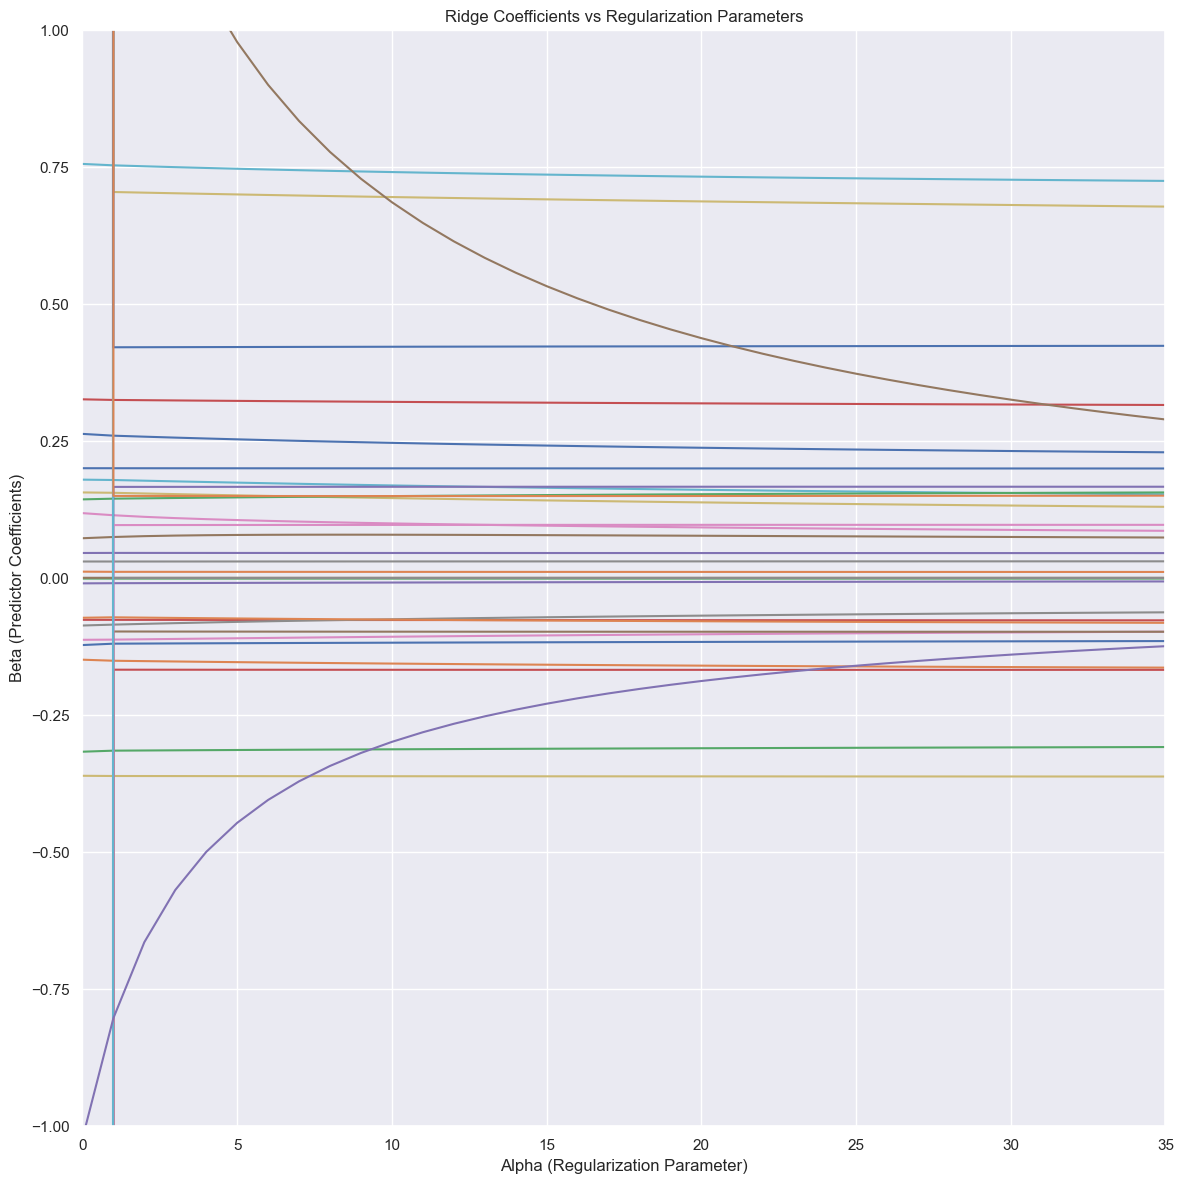

In [119]:
coef=[]
alphas = range(0,40)

for a in alphas:
  ridgereg = Ridge(alpha=a)
  ridgereg.fit(X, y)
  coef.append(ridgereg.coef_)

###Make plot of Beta as a function of Alpha
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(alphas,coef)
ax.set_xlabel('Alpha (Regularization Parameter)')
ax.set_ylabel('Beta (Predictor Coefficients)')
ax.set_title('Ridge Coefficients vs Regularization Parameters')
ax.axis('tight')
plt.ylim(-1, 1)
plt.xlim(0, 35)
fig.savefig('coef_vs_alpha.png')

# Using OLS to predict (after flattening data through ridge regularization)

Now we can use the OLS we calculated earlier to predict on test data. More information about the ridge function can be found here: https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.fit_regularized.html.

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Ridge regression object and fit the model to the training data
ridge = Ridge(alpha=35)
ridge.fit(X_train, y_train)

# Make predictions using the Ridge model on the testing data
y_pred = ridge.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print('R-squared score with Ridge regularization:', r2)

# Perform OLS on the new dataframe
import statsmodels.api as sm
X_ols = X
y_ols = y
X_ols = sm.add_constant(X_ols)
model_ols = sm.OLS(y_ols, X_ols).fit()
print(model_ols.summary())

R-squared score with Ridge regularization: 0.5227951439859293
                            OLS Regression Results                            
Dep. Variable:                  w_ace   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     1486.
Date:                Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                        10:40:58   Log-Likelihood:            -1.1788e+05
No. Observations:               42913   AIC:                         2.358e+05
Df Residuals:                   42880   BIC:                         2.361e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

Now we want to see how accruate our prediction is of our OLS. We do this in the code below.

In [121]:
s1 = model_ols.predict(X_ols)
s2 = df['w_ace']
s3 = 1 - abs(s2 - s1)/s2
data = {'Actual': s2, 'Predicted': s1, 'Accuracy': s3}
df_to_graph = pd.DataFrame(data)

In [128]:
df_to_graph

Actual  Predicted  Accuracy
0       8.0  10.261121  0.717360
1       4.0   3.436732  0.859183
2       4.0   3.335219  0.833805
3       8.0   5.752750  0.719094
4       3.0   5.298179  0.233940
..      ...        ...       ...
358     8.0   8.968136  0.878983
359     4.0   7.172974  0.206756
361     4.0   7.975373  0.006157
367    25.0  16.446268  0.657851
384    12.0   7.769555  0.647463

[42913 rows x 3 columns]

Here is a boxplot of our accuracy showing how well we have done. To further understand this, look at this link: https://seaborn.pydata.org/generated/seaborn.boxplot.html.

<AxesSubplot:ylabel='Accuracy'>

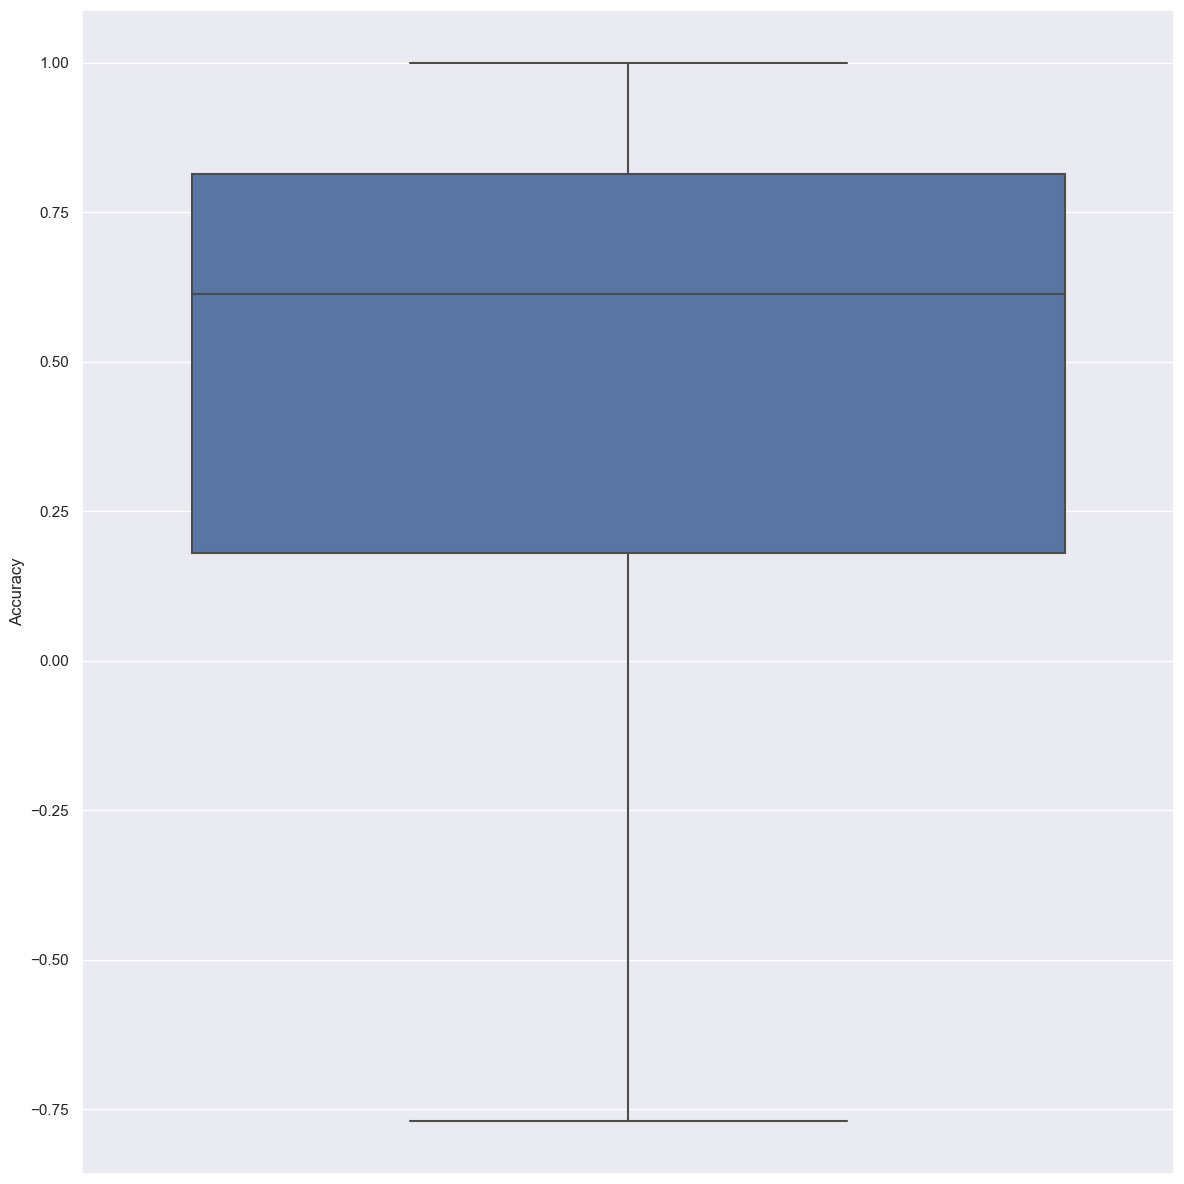

In [123]:
df_g = df_to_graph[df_to_graph['Accuracy'] != float('inf')]
sns.boxplot(y=df_g['Accuracy'], showfliers=False)

Here is an sns lineplot for our data. Here we examine the predicted values from our multilinear regression model vs the actual values.

<AxesSubplot:>

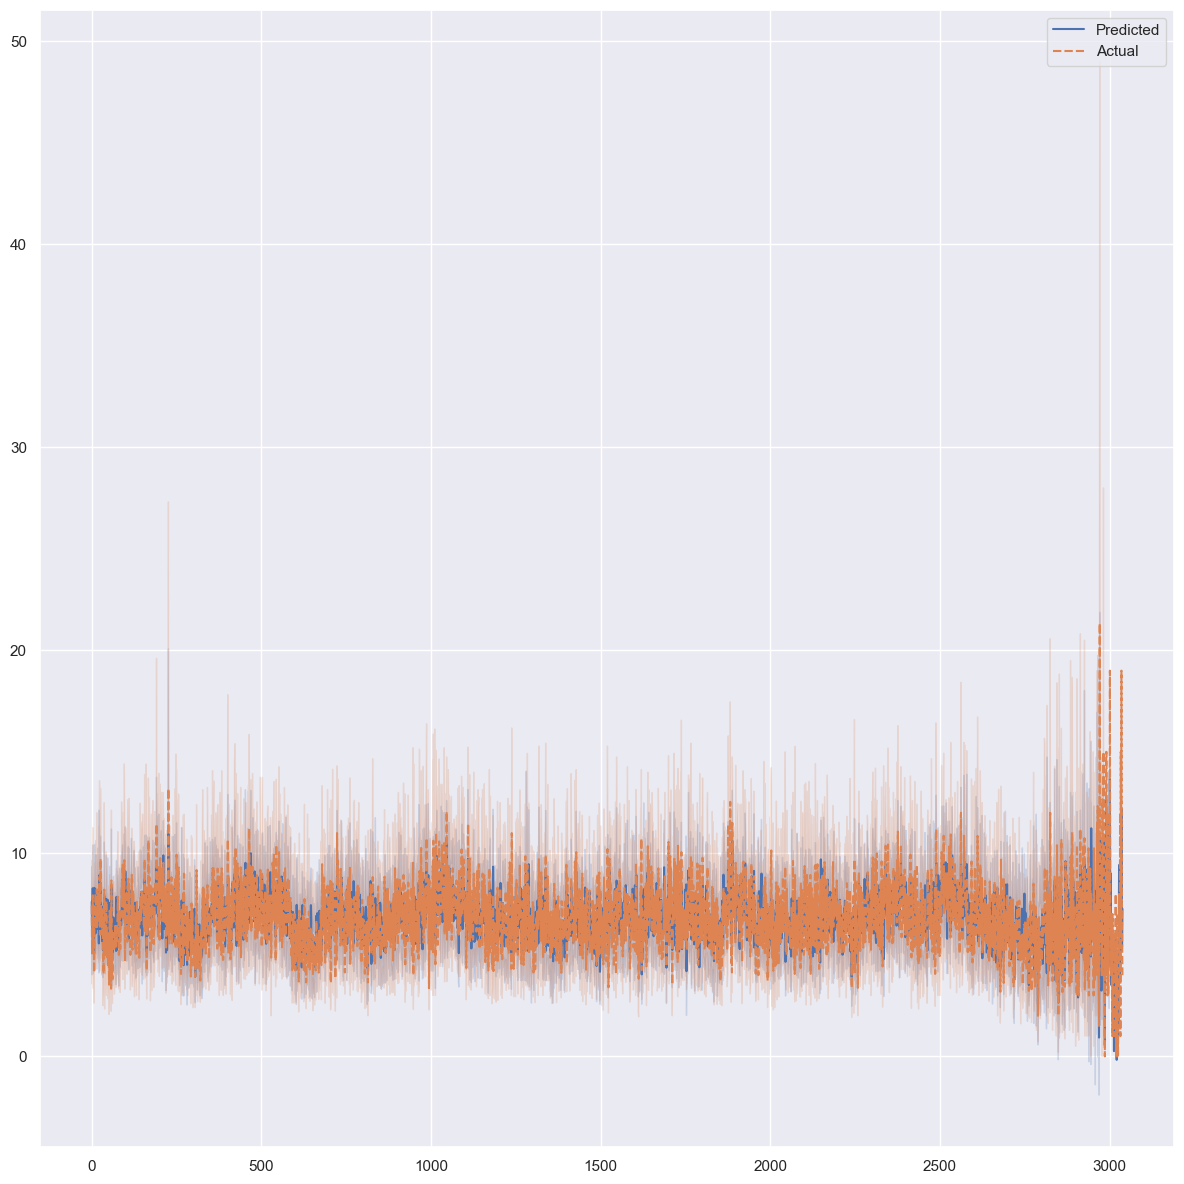

In [124]:
sns.lineplot(data=df_to_graph[['Predicted', 'Actual']])

<h1>Insights / Conclusion</h1>

In this project, we found data about tennis matches and how statistics are related to one another, cleaned our data, and took an exploratory look at the data (aided by visualization using Seaborn and matplotlib libraries of python). Then, we looked at how features might be related through the use of a covariance matrix displayed in a heatmap, and also performed an importance test from the random forest librarys's permutations method. <br><br>After fitting a random forest to our data, we realized that the performace could be significantly improved if we transformed our data through the statsmodels library's Ridge function (to make our data more 'flat'), and then using OLS to come up with a linear regression model of our data for the number of aces a winner will serve during a match. This model had significantly better accuracy, with the mean lying somewhere around the 60% mark (displayed in the above boxplot).

This project demonstrates that we can select many features for a large dataset and determine which one has the greatest impact on winning a tennis match.